In [1]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-09 17:31:43,905 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-09 17:31:43,907 - settings - Setting database.user to celiib
INFO - 2021-01-09 17:31:43,907 - settings - Setting database.password to newceliipass
INFO - 2021-01-09 17:31:43,911 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-09 17:31:43,912 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-09 17:31:43,924 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-09 17:31:44,168 - settings - Setting enable_python_native_blobs to True


In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-09 17:31:44,205 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-09 17:31:44,207 - settings - Setting database.user to celiib
INFO - 2021-01-09 17:31:44,207 - settings - Setting database.password to newceliipass
INFO - 2021-01-09 17:31:44,209 - settings - Setting enable_python_native_blobs to True


Sleeping 199 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-09 17:31:44,456 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [5]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [6]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 7795


In [7]:
#so that it will have the adapter defined
from datajoint_utils import *

In [8]:
key_source = minnie.Decomposition()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,29.00,=BLOB=,1400375,2824255,0,0,0,1,8,427,292,10485954.599357573,4727993.083156605,13445.294,87.88,87.88,580.726,553.126,2350,0.0002241093052361655,5.503512880562061,4549944.99,150,0.0005164897609014828,15.667,86456604345.94843,20733767.594250996,8244.991290658958,19001.6812370183,576377362.3063228,6052.7497
864691135012398582,0,0.25,29.00,=BLOB=,1376990,2794781,4,1,4,2,8,330,131,13929332.12258168,4744489.087608502,25208.79,181.248,177.914,503.855,470.905,5197,0.00037309757239364195,15.748484848484848,8746791.671,174,0.0005941607157777246,29.868,251421367265.7805,24448738.045176186,18049.7790599871,28744.410147479375,1444950386.5849454,5996.9728
864691135012471798,0,0.25,29.00,=BLOB=,879119,1793791,2,1,2,2,8,287,83,10504921.973170185,3098908.649973214,20600.38,101.514,101.514,460.035,401.749,2708,0.00025778392328056266,9.435540069686411,6126023.074,125,0.00044204861249923526,21.664,133822127394.86624,32030964.53258705,12738.99299172817,21844.8617934256,1070577019.15893,10541.8198
864691135012571126,0,0.25,29.00,=BLOB=,1405952,2834699,4,4,0,1,8,434,190,14952565.529701162,5950582.376110614,22558.465,138.374,138.374,462.864,403.433,5410,0.000361810820307311,12.465437788018432,8599310.865,213,0.0006291201800855004,25.399,343080427437.90247,35381025.859495796,22944.586115099886,39896.26992486943,1610706232.1028285,18348.506
864691135012905110,0,0.25,29.00,=BLOB=,816541,1676641,1,1,0,1,9,266,119,10125935.219943585,4352752.241138446,24325.062,90.366,90.366,387.869,355.32,2433,0.00024027410280169214,9.146616541353383,5469864.913,104,0.0004448007471295297,23.394,145698898455.88928,31207278.626825333,14388.6856168038,26636.65387962558,1400950946.6912432,11106.3706
864691135065018692,0,0.25,29.00,=BLOB=,927599,1896021,1,1,1,2,18,276,61,10166672.817443343,2066816.1113789165,17200.227,109.19,109.19,532.523,523.56,2023,0.00019898348617347682,7.329710144927536,5487593.34,122,0.000368649765873504,16.582,124429383137.71652,33444570.407502748,12238.948313968396,22674.67274419364,1019912976.53866,4207.7487
864691135065024068,0,0.25,29.00,=BLOB=,1683573,3378174,2,2,0,1,11,336,99,15436829.265081966,4735182.057076573,30246.518,312.805,283.607,621

In [9]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

    key_source = minnie.Decomposition()
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [10]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table)#.delete()# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__neuron_split_suggestions,502a39f8507e8566285266a8332bb817,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,20388,26929,2021-01-09 11:30:56
__neuron_split_suggestions,5fae231db4410df1eff93ff1e1b6d260,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,20514,26931,2021-01-09 11:31:12
__neuron_split_suggestions,7b5265ddb05b48d5f7a19ed80bbec5f6,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,20451,26930,2021-01-09 11:31:04


INFO - 2021-01-09 17:31:44,605 - autopopulate - Found 88 keys to populate
INFO - 2021-01-09 17:31:44,617 - connection - Transaction started
INFO - 2021-01-09 17:31:44,618 - autopopulate - Populating: {'segment_id': 864691136390485119, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('29.00')}


Populate Started


----- Working on 864691136390485119-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [0 1]
multi_touch_limbs = [0]


 -------- Working on limb 0------------
Starting combinations to process = [[ 47 107]
 [ 47 126]
 [107 126]]


---- working on disconnecting 47 and 107
---- This disconnects S1_0 from S0_1  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [47, 46, 49, 56, 63, 94, 106, 123, 27, 23, 107]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 13  19  23  27  28  39  43  46  49  55  56  63  93  94 105 106 122 123
 124]
Short segments to combine = []
Found 0 high degree coordinates to cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [47 46]: curr_angle = 47.94
  Edge: [46 49]: curr_angle = 24.36
  Edge: [49 56]: curr_angle = 17.49
  Edge: [56 63]: curr_angle = 55.47
  Edge: [63 94]: curr_angle = 44.52
  Edge: [ 94 106]: curr_angle = 48.75
  Edge: [106 123]: curr_angle = 90.92
  Edge: [123  27]: curr_angle = 116.19
  Edge: [27 23]: curr_angle = 25.49
  Edge: [ 23 107]: curr_angle = 45.76

Total time for doubling_back = 1.0408246517181396
There were 1 edges that passed doubling back threshold of 100
Winning edge [123  27] had a doubling back of 116.19325667463964
***inside resolve crossover!!!!****
coordinate_branches = [27, 123, 124]
27 = red
123 = aqua
124 = purple
Angle between 27 and 123 = 95.13 
Angle between 27 and 124 = 57.61 
Angle between 123 and 124 = 27.41 
Final Matches = [[123, 124]]
matched_branches_revised = [[123, 124]]
Original graph


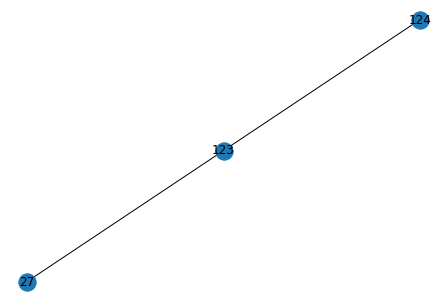

match_branches = [[123, 124]]
edges_to_delete (resolve crossover) = [[27, 123], [27, 124]]
edges_to_create (resolve crossover) = [[123, 124]]
edges_to_delete (cut_limb_network) = [array([ 27, 123]), array([ 27, 124])]
edges_to_create = [[123, 124]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166}
Co

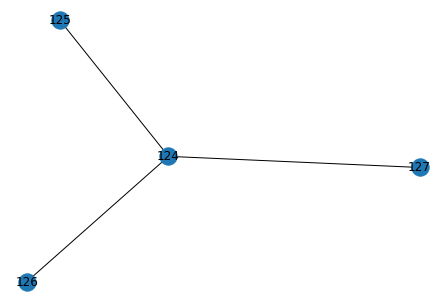

match_branches = [[124, 126]]
edges_to_delete (resolve crossover) = [[124, 125], [124, 127], [125, 126], [125, 127], [126, 127]]
edges_to_create (resolve crossover) = [[124, 126]]
curr_limb.deleted_edges 5 =[array([ 27, 123]), array([ 27, 124])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[124, 125], [124, 127], [125, 126], [125, 127], [126, 127]]
edges_to_create = [[124, 126]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 126, 128, 129, 130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 

  Edge: [47 46]: curr_angle = 47.94
  Edge: [46 49]: curr_angle = 24.36
  Edge: [49 56]: curr_angle = 17.49
  Edge: [56 63]: curr_angle = 55.47
  Edge: [63 94]: curr_angle = 44.52
  Edge: [ 94 106]: curr_angle = 48.75
  Edge: [106 123]: curr_angle = 90.92
  Edge: [123 124]: curr_angle = 17.09
  Edge: [124 126]: curr_angle = 18.44

Total time for doubling_back = 0.3677372932434082

Attempting the width jump check (attempting from both sides)
  Edge: [47 46]: jump = -304.51
  Edge: [46 49]: jump = -270.6
  Edge: [49 56]: jump = -120.28
  Edge: [56 63]: jump = -153.13
  Edge: [63 94]: jump = 54.48
  Edge: [ 94 106]: jump = 206.23
Adding error edge [ 94 106] because width jump was 206.229351933493
  Edge: [106 123]: jump = 585.62
Adding error edge [106 123] because width jump was 585.6180051287813
  Edge: [123 124]: jump = 97.26
  Edge: [124 126]: jump = 162.39
Total time for width = 0.3327772617340088
Path starting at 47 had err_edges: [[94, 106], [106, 123]]
  Edge: [126 124]: jump = -16

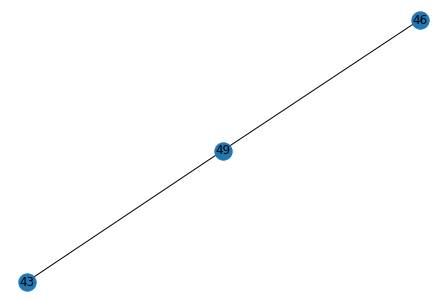

match_branches = []
edges_to_delete (resolve crossover) = [[43, 46], [43, 49], [46, 49]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([43, 46]), array([43, 49]), array([46, 49])]
edges_to_create = []
Number of connected components = 6
Comp 0 = {1, 2, 26, 4, 39, 40, 46, 47, 14, 50, 20, 58, 61}
Comp 1 = {0, 3, 5, 6, 7, 8, 10, 11, 12, 15, 16, 17, 18, 21, 22, 24, 25, 29, 30, 31, 33, 34, 35, 36, 41, 42, 43, 44, 45, 51, 53, 54, 57, 59, 60, 64, 68, 69, 70, 72, 84, 85, 96, 97, 98, 99, 100, 102, 103, 108, 111, 128, 129, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166}
Comp 2 = {130, 131, 9, 28, 32, 37, 38, 48, 49, 52, 55, 56, 62, 63, 65, 66, 67, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 104, 105, 106, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 126}
Comp 3 = {107, 13, 19

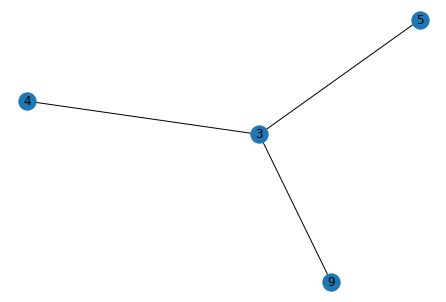

match_branches = [[3, 9], [4, 5]]
edges_to_delete (resolve crossover) = [[3, 4], [3, 5], [4, 9], [5, 9]]
edges_to_create (resolve crossover) = [[3, 9], [4, 5]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[3, 4], [3, 5], [4, 9], [5, 9]]
edges_to_create = [[3, 9], [4, 5]]
Number of connected components = 2
Comp 0 = {1, 2, 3, 9, 10, 11}
Comp 1 = {0, 4, 5, 6, 7, 8}
curr_limb_copy.deleted_edges = [[3, 4], [3, 5], [4, 9], [5, 9]]
curr_limb_copy.created_edges = [[3, 9], [4, 5]]
After get best cut: cut_edges = [[3, 4], [3, 5], [4, 9], [5, 9]], added_edges = [[3, 9], [4, 5]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 1,  2,  3,  9, 10, 11]), array([0, 4, 5, 6, 7, 8])]


 --

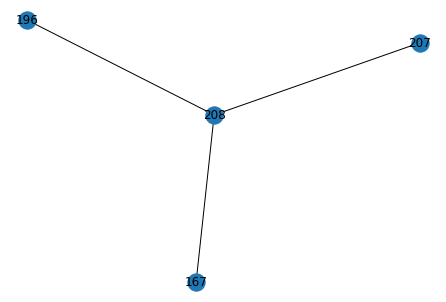

match_branches = [[196, 208], [167, 207]]
edges_to_delete (resolve crossover) = [[167, 196], [167, 208], [196, 207], [207, 208]]
edges_to_create (resolve crossover) = [[196, 208], [167, 207]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[167, 196], [167, 208], [196, 207], [207, 208]]
edges_to_create = [[196, 208], [167, 207]]
Number of connected components = 2
Comp 0 = {2, 80, 23, 152, 25, 26, 153, 28, 81, 36, 42, 43, 47, 48, 49, 50, 51, 52, 53, 54, 87, 57, 58, 64, 65, 66, 67, 68, 69, 70, 196, 72, 201, 202, 71, 76, 77, 78, 79, 208, 209, 82, 83, 84, 85, 210, 213, 88, 89, 90, 91, 92, 93, 86, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 110, 111}
Comp 1 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 27, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 44, 45, 46, 55, 56, 59, 60, 61, 62, 63, 73, 74, 75, 95, 106, 107, 108, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128

  Edge: [156 162]: curr_angle = 43.64
  Edge: [162 164]: curr_angle = 133.3
  Edge: [164 165]: curr_angle = 73.11
  Edge: [165 160]: curr_angle = 30.59
  Edge: [160 161]: curr_angle = 83.1
  Edge: [161 173]: curr_angle = 36.22
  Edge: [173 157]: curr_angle = 97.99
  Edge: [157 166]: curr_angle = 42.33

Total time for doubling_back = 0.5997216701507568
There were 1 edges that passed doubling back threshold of 100
Winning edge [162 164] had a doubling back of 133.30053902499665
***inside resolve crossover!!!!****
coordinate_branches = [135, 162, 164]
135 = red
162 = aqua
164 = purple
Angle between 135 and 162 = 6.55 
Angle between 135 and 164 = 38.09 
Angle between 162 and 164 = 135.4 
Final Matches = [[135, 162]]
matched_branches_revised = [[135, 162]]
Original graph


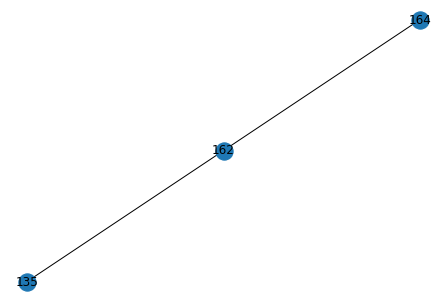

match_branches = [[135, 162]]
edges_to_delete (resolve crossover) = [[135, 164], [162, 164]]
edges_to_create (resolve crossover) = [[135, 162]]
edges_to_delete (cut_limb_network) = [array([135, 164]), array([162, 164])]
edges_to_create = [[135, 162]]
Number of connected components = 3
Comp 0 = {2, 80, 23, 152, 25, 26, 153, 28, 81, 36, 42, 43, 47, 48, 49, 50, 51, 52, 53, 54, 87, 57, 58, 64, 65, 66, 67, 68, 69, 70, 196, 72, 201, 202, 71, 76, 77, 78, 79, 208, 209, 82, 83, 84, 85, 210, 213, 88, 89, 90, 91, 92, 93, 86, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 110, 111}
Comp 1 = {256, 257, 258, 259, 260, 261, 262, 135, 263, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 156, 162, 163, 167, 169, 264, 182, 199, 247, 204, 205, 206, 207, 244, 211, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 248, 234, 235, 236, 233, 249, 239, 251, 240, 243, 116, 245, 118, 254, 120, 246, 250, 123, 252, 253, 126, 255}
Comp 2 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10,

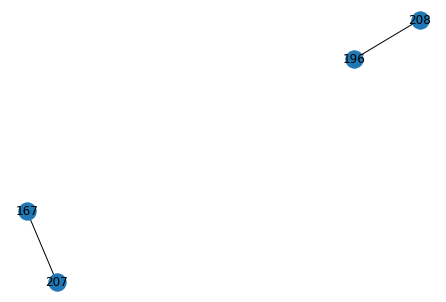

match_branches = [[196, 208], [167, 207]]
edges_to_delete (resolve crossover) = [[167, 196], [167, 208], [196, 207], [207, 208]]
edges_to_create (resolve crossover) = [[196, 208], [167, 207]]
curr_limb.deleted_edges 5 =[[167, 196], [167, 208], [196, 207], [207, 208], array([135, 164]), array([162, 164])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[167, 196], [167, 208], [196, 207], [207, 208]]
edges_to_create = [[196, 208], [167, 207]]
Number of connected components = 3
Comp 0 = {2, 80, 23, 152, 25, 26, 153, 28, 81, 36, 42, 43, 47, 48, 49, 50, 51, 52, 53, 54, 87, 57, 58, 64, 65, 66, 67, 68, 69, 70, 196, 72, 201, 202, 71, 76, 77, 78, 79, 208, 209, 82, 83, 84, 85, 210, 213, 88, 89, 90, 91, 92, 93, 86, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 110, 111}
Comp 1 = {256, 257, 258, 259, 260, 261, 262, 135, 263, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 156, 162, 163, 167, 169, 264, 182, 199, 247, 204, 205, 206, 207, 244, 211, 215, 216, 219, 220, 221, 222, 

  Edge: [156 163]: curr_angle = 39.41
  Edge: [163 167]: curr_angle = 16.11
  Edge: [167 207]: curr_angle = 4.53
  Edge: [207 211]: curr_angle = 44.38
  Edge: [211 206]: curr_angle = 10.86
  Edge: [206 216]: curr_angle = 28.78
  Edge: [216 226]: curr_angle = 26.47
  Edge: [226 229]: curr_angle = 33.08
  Edge: [229 230]: curr_angle = 11.43
  Edge: [230 231]: curr_angle = 25.22
  Edge: [231 232]: curr_angle = 31.1
  Edge: [232 234]: curr_angle = 21.82

Total time for doubling_back = 1.3504586219787598

Attempting the width jump check (attempting from both sides)
  Edge: [156 163]: jump = -92.56
  Edge: [163 167]: jump = -84.54
  Edge: [167 207]: jump = 216.51
Adding error edge [167 207] because width jump was 216.51154673856178
  Edge: [207 211]: jump = -289.18
  Edge: [211 206]: jump = 16.19
  Edge: [206 216]: jump = 114.57
  Edge: [216 226]: jump = 357.81
Adding error edge [216 226] because width jump was 357.81043135524544
  Edge: [226 229]: jump = 69.87
  Edge: [229 230]: jump = 34.5

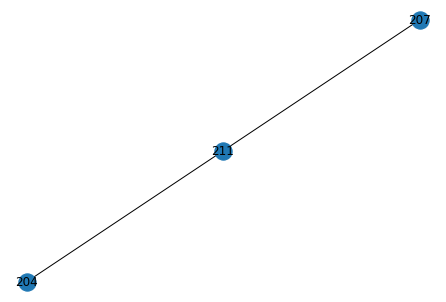

match_branches = []
edges_to_delete (resolve crossover) = [[204, 207], [204, 211], [207, 211]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([204, 207]), array([204, 211]), array([207, 211])]
edges_to_create = []
Number of connected components = 5
Comp 0 = {2, 80, 23, 152, 25, 26, 153, 28, 81, 36, 42, 43, 47, 48, 49, 50, 51, 52, 53, 54, 87, 57, 58, 64, 65, 66, 67, 68, 69, 70, 196, 72, 201, 202, 71, 76, 77, 78, 79, 208, 209, 82, 83, 84, 85, 210, 213, 88, 89, 90, 91, 92, 93, 86, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 110, 111}
Comp 1 = {162, 163, 167, 135, 207, 116, 118, 120, 123, 156, 126}
Comp 2 = {204}
Comp 3 = {256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 169, 182, 199, 205, 206, 211, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 239, 240, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255}
Comp 4 = {0, 1, 3, 

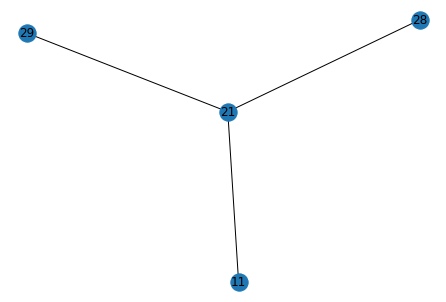

match_branches = [[21, 28]]
edges_to_delete (resolve crossover) = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]]
edges_to_create (resolve crossover) = [[21, 28]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 73 because skeletal distance was 374.63979587072697 and threshold was 2500
skip_nodes = [73]
edges_to_delete (cut_limb_network) = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]]
edges_to_create = [[21, 28]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 75, 76}
Comp 1 = {11}
Comp 2 = {71, 9, 74, 47, 29}
curr_limb_copy.deleted_edges = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]]
curr_limb_copy.created_edges = [[21, 28]]
After get best cut: cut_edges = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]], added_

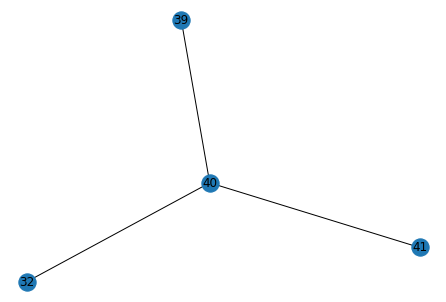

match_branches = [[32, 40]]
edges_to_delete (resolve crossover) = [[32, 39], [32, 41], [39, 40], [39, 41], [40, 41]]
edges_to_create (resolve crossover) = [[32, 40]]
curr_limb.deleted_edges 5 =[[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]]
Skipping endnode 73 because skeletal distance was 374.63979587072697 and threshold was 2500
skip_nodes = [73]
edges_to_delete (cut_limb_network) = [[32, 39], [32, 41], [39, 40], [39, 41], [40, 41]]
edges_to_create = [[32, 40]]
Number of connected components = 5
Comp 0 = {4, 8, 12, 13, 15, 16, 21, 25, 28, 32, 34, 35, 36, 40, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 64, 65, 66, 68, 72, 73}
Comp 1 = {0, 1, 2, 3, 5, 6, 7, 10, 14, 17, 18, 19, 20, 22, 23, 24, 26, 27, 30, 31, 33, 37, 38, 39, 42, 43, 44, 45, 46, 61, 62, 63, 67, 75, 76}
Comp 2 = {41, 69, 70}
Comp 3 = {11}
Comp 4 = {71, 9, 74, 47, 29}
curr_limb_copy.deleted_edges = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29], [32, 39], [32, 41], [39, 40], [39, 41], [40, 41]]
curr_limb_copy

  Edge: [59 57]: curr_angle = 22.81
  Edge: [57 54]: curr_angle = 16.43
  Edge: [54 53]: curr_angle = 4.39
  Edge: [53 40]: curr_angle = 9.28
  Edge: [40 32]: curr_angle = 18.85
  Edge: [32 21]: curr_angle = 37.1
  Edge: [21 28]: curr_angle = 10.32
  Edge: [28 34]: curr_angle = 2.77
  Edge: [34 36]: curr_angle = 130.36
  Edge: [36 72]: curr_angle = 44.08

Total time for doubling_back = 1.390010118484497
There were 1 edges that passed doubling back threshold of 100
Winning edge [34 36] had a doubling back of 130.35759779681874
***inside resolve crossover!!!!****
coordinate_branches = [12, 34, 36]
12 = red
34 = aqua
36 = purple
Angle between 12 and 34 = 14.15 
Angle between 12 and 36 = 48.62 
Angle between 34 and 36 = 139.17 
Final Matches = [[12, 34]]
matched_branches_revised = [[12, 34]]
Original graph


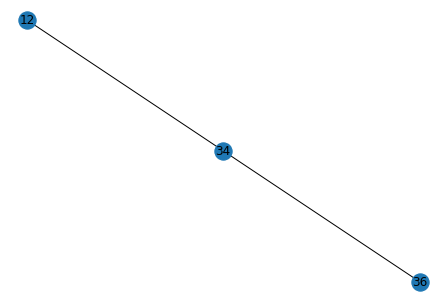

match_branches = [[12, 34]]
edges_to_delete (resolve crossover) = [[12, 36], [34, 36]]
edges_to_create (resolve crossover) = [[12, 34]]
edges_to_delete (cut_limb_network) = [array([12, 36]), array([34, 36])]
edges_to_create = [[12, 34]]
Number of connected components = 6
Comp 0 = {4, 12, 13, 21, 28, 32, 34, 35, 40, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60}
Comp 1 = {0, 1, 2, 3, 5, 6, 7, 10, 14, 17, 18, 19, 20, 22, 23, 24, 26, 27, 30, 31, 33, 37, 38, 39, 42, 43, 44, 45, 46, 61, 62, 63, 67, 75, 76}
Comp 2 = {41, 69, 70}
Comp 3 = {11}
Comp 4 = {71, 9, 74, 47, 29}
Comp 5 = {64, 65, 66, 36, 68, 72, 73, 8, 15, 16, 25}
curr_limb_copy.deleted_edges = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29], [32, 39], [32, 41], [39, 40], [39, 41], [40, 41], array([12, 36]), array([34, 36])]
curr_limb_copy.created_edges = [[21, 28], [32, 40], [12, 34]]
After get best cut: cut_edges = [array([12, 36]), array([34, 36])], added_edges = [[12, 34]]
total_soma_paths_to_cut = [[11, 21], [11, 28], [1

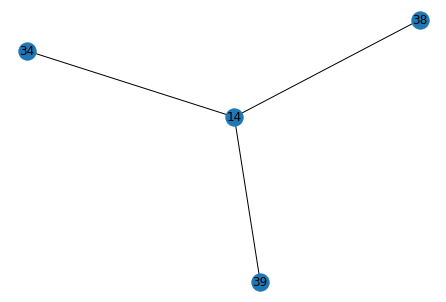

match_branches = []
edges_to_delete (resolve crossover) = [[14, 34], [14, 38], [14, 39], [34, 38], [34, 39], [38, 39]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
Skipping endnode 16 because skeletal distance was 549.4559181373367 and threshold was 2500
skip_nodes = [16]
edges_to_delete (cut_limb_network) = [[14, 34], [14, 38], [14, 39], [34, 38], [34, 39], [38, 39]]
edges_to_create = []
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 41, 42, 43, 44}
Comp 1 = {33, 34, 23}
Comp 2 = {38}
Comp 3 = {39}
Comp 4 = {40}
curr_limb_copy.deleted_edges = [[14, 34], [14, 38], [14, 39], [34, 38], [34, 39], [38, 39]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[14, 34], [14, 38], [14, 39], [34, 38], [34, 39], [38, 39]], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total num

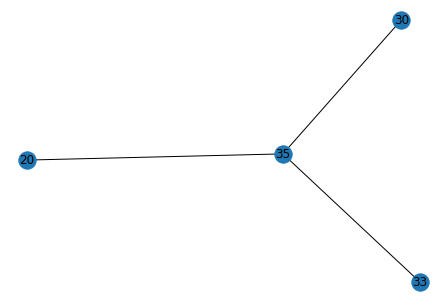

match_branches = []
edges_to_delete (resolve crossover) = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35]]
edges_to_create = []
Number of connected components = 6
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26, 28, 29, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69}
Comp 1 = {20}
Comp 2 = {27, 30, 22}
Comp 3 = {33}
Comp 4 = {34}
Comp 5 = {48}
curr_limb_copy.deleted_edges = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35]], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iter

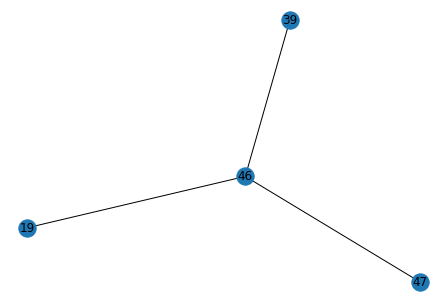

match_branches = [[39, 46], [19, 47]]
edges_to_delete (resolve crossover) = [[19, 39], [19, 46], [39, 47], [46, 47]]
edges_to_create (resolve crossover) = [[39, 46], [19, 47]]
curr_limb.deleted_edges 5 =[[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[19, 39], [19, 46], [39, 47], [46, 47]]
edges_to_create = [[39, 46], [19, 47]]
Number of connected components = 7
Comp 0 = {11, 12, 13, 14, 15, 16, 17, 21, 23, 24, 25, 26, 28, 29, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69}
Comp 1 = {20}
Comp 2 = {27, 30, 22}
Comp 3 = {33}
Comp 4 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 47, 18, 19}
Comp 5 = {34}
Comp 6 = {48}
curr_limb_copy.deleted_edges = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35], [19, 39], [19, 46], [39, 47], [46, 47]]
curr_limb_copy.created_edges = [[39, 46], [19, 47]]
After get best cut: cut_edges = [[19, 39], [

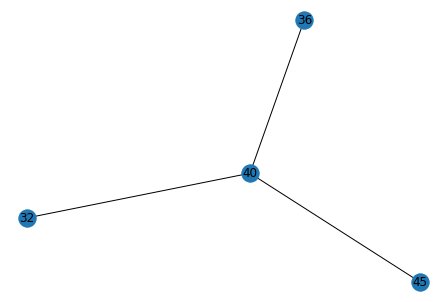

match_branches = [[40, 45], [32, 36]]
edges_to_delete (resolve crossover) = [[32, 40], [32, 45], [36, 40], [36, 45]]
edges_to_create (resolve crossover) = [[40, 45], [32, 36]]
curr_limb.deleted_edges 5 =[[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35], [19, 39], [19, 46], [39, 47], [46, 47]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[32, 40], [32, 45], [36, 40], [36, 45]]
edges_to_create = [[40, 45], [32, 36]]
Number of connected components = 8
Comp 0 = {11, 12, 13, 14, 24, 25, 26, 29, 32, 35, 36, 37, 38, 53, 54, 57, 58, 59, 60, 61, 62, 63, 66, 67, 68, 69}
Comp 1 = {20}
Comp 2 = {27, 30, 22}
Comp 3 = {33}
Comp 4 = {15, 16, 17, 21, 23, 28, 31, 39, 40, 41, 42, 43, 44, 45, 46, 49, 50, 51, 52, 55, 56, 64, 65}
Comp 5 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 47, 18, 19}
Comp 6 = {34}
Comp 7 = {48}
curr_limb_copy.deleted_edges = [[20, 30], [20, 33], [20, 35], [30, 33], [30, 35], [33, 35], [19, 39], [19, 46], [39, 47], [46, 47], [32, 40], [32, 45], [36, 40], [36, 45]]
curr_l

  Edge: [29 24]: curr_angle = 30.47
  Edge: [24 25]: curr_angle = 92.32
  Edge: [25 26]: curr_angle = 23.0
  Edge: [26 53]: curr_angle = 97.18
  Edge: [53 54]: curr_angle = 45.04
  Edge: [54 58]: curr_angle = 23.14
  Edge: [58 60]: curr_angle = 25.65
  Edge: [60 62]: curr_angle = 20.66
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [62 61]: curr_angle = 51.49

Total time for doubling_back = 0.3774890899658203

Attempting the width jump check (attempting from both sides)
  Edge: [29 24]: jump = -51.27
  Edge: [24 25]: jump = -211.35
  Edge: [25 26]: jump = 209.32
Adding error edge [25 26] because width jump was 209.31841357956674
  Edge: [26 53]: jump = 177.61
  Edge: [53 54]: jump = 42.59
  Edge: [54 58]: jump = 2.85
  Edge: [58 60]: jump = 17.62
  Edge: [60 62]: jump = 294.6
Adding error edge [60 62] because width jump was 294.59505034379777
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [62 61]:

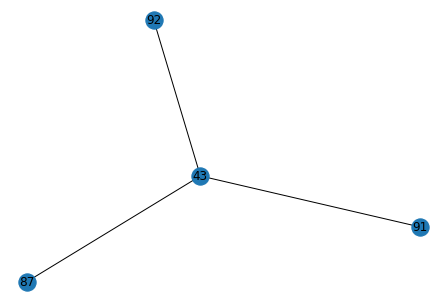

match_branches = [[43, 91]]
edges_to_delete (resolve crossover) = [[43, 87], [43, 92], [87, 91], [87, 92], [91, 92]]
edges_to_create (resolve crossover) = [[43, 91]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 97 because skeletal distance was 1132.7173193547114 and threshold was 2500
skip_nodes = [97]
edges_to_delete (cut_limb_network) = [[43, 87], [43, 92], [87, 91], [87, 92], [91, 92]]
edges_to_create = [[43, 91]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 42, 43, 46, 47, 49, 51, 85, 91, 102}
Comp 1 = {74, 68, 71, 87}
Comp 2 = {33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 12

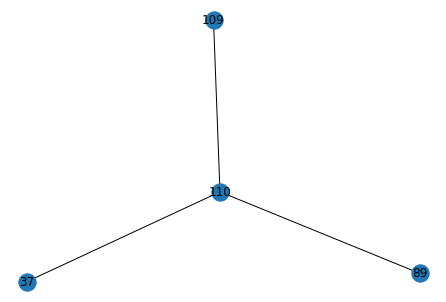

match_branches = [[89, 109], [37, 110]]
edges_to_delete (resolve crossover) = [[37, 89], [37, 109], [89, 110], [109, 110]]
edges_to_create (resolve crossover) = [[89, 109], [37, 110]]
curr_limb.deleted_edges 5 =[[43, 87], [43, 92], [87, 91], [87, 92], [91, 92]]
Skipping endnode 97 because skeletal distance was 1132.7173193547114 and threshold was 2500
skip_nodes = [97]
edges_to_delete (cut_limb_network) = [[37, 89], [37, 109], [89, 110], [109, 110]]
edges_to_create = [[89, 109], [37, 110]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 42, 43, 46, 47, 49, 51, 85, 91, 102}
Comp 1 = {74, 68, 71, 87}
Comp 2 = {128, 129, 130, 131, 33, 36, 38, 39, 40, 41, 44, 45, 48, 50, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 72, 73, 75, 76, 77, 78, 81, 82, 83, 84, 86, 89, 90, 92, 93, 94, 95, 96, 97, 99, 106, 107, 109, 113, 114, 115, 116, 117, 119, 120,

  Edge: [100 103]: curr_angle = 129.41
  Edge: [103 104]: curr_angle = 43.39
  Edge: [104 101]: curr_angle = 90.91

Total time for doubling_back = 0.1915898323059082
There were 1 edges that passed doubling back threshold of 100
Winning edge [100 103] had a doubling back of 129.41156829792632
***inside resolve crossover!!!!****
coordinate_branches = [100, 103, 108]
100 = red
103 = aqua
108 = purple
Angle between 100 and 103 = 134.51 
Angle between 100 and 108 = 17.26 
Angle between 103 and 108 = 30.21 
Final Matches = [[100, 108], [103, 108]]
matched_branches_revised = [[100, 108]]
Original graph


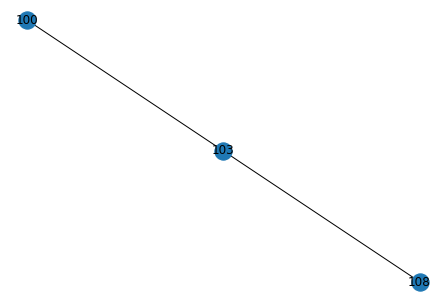

match_branches = [[100, 108]]
edges_to_delete (resolve crossover) = [[100, 103], [103, 108]]
edges_to_create (resolve crossover) = [[100, 108]]
edges_to_delete (cut_limb_network) = [array([100, 103]), array([103, 108])]
edges_to_create = [[100, 108]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 42, 43, 46, 47, 49, 51, 85, 91, 102}
Comp 1 = {74, 68, 71, 87}
Comp 2 = {128, 129, 130, 131, 33, 36, 38, 39, 40, 41, 44, 45, 48, 50, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 72, 73, 75, 76, 77, 78, 81, 82, 83, 84, 86, 89, 90, 92, 93, 94, 95, 96, 97, 99, 106, 107, 109, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127}
Comp 3 = {132, 133, 134, 135, 136, 138, 139, 140, 141, 143, 144, 145, 146, 147, 149, 150, 152, 153, 154, 155, 156, 157, 158, 37, 54, 79, 80, 98, 101, 103, 104, 110, 111, 118}
Comp 4 = {137, 142, 148, 151, 159

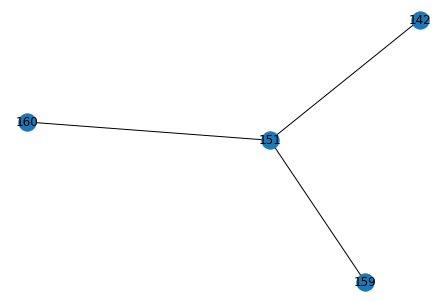

match_branches = [[151, 160]]
edges_to_delete (resolve crossover) = [[142, 151], [142, 159], [142, 160], [151, 159], [159, 160]]
edges_to_create (resolve crossover) = [[151, 160]]
curr_limb.deleted_edges 5 =[[43, 87], [43, 92], [87, 91], [87, 92], [91, 92], [37, 89], [37, 109], [89, 110], [109, 110], array([100, 103]), array([103, 108])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[142, 151], [142, 159], [142, 160], [151, 159], [159, 160]]
edges_to_create = [[151, 160]]
Number of connected components = 7
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 42, 43, 46, 47, 49, 51, 85, 91, 102}
Comp 1 = {74, 68, 71, 87}
Comp 2 = {128, 129, 130, 131, 33, 36, 38, 39, 40, 41, 44, 45, 48, 50, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 72, 73, 75, 76, 77, 78, 81, 82, 83, 84, 86, 89, 90, 92, 93, 94, 95, 96, 97, 99, 106, 107, 109, 113, 114, 115, 116, 117, 119, 120, 121, 122,

  Edge: [100 108]: curr_angle = 18.09
  Edge: [108 148]: curr_angle = 35.86
  Edge: [148 151]: curr_angle = 25.92
  Edge: [151 160]: curr_angle = 34.32
  Edge: [160 161]: curr_angle = 43.47

Total time for doubling_back = 0.5158371925354004

Attempting the width jump check (attempting from both sides)
  Edge: [100 108]: jump = 217.39
Adding error edge [100 108] because width jump was 217.38537748442985
  Edge: [108 148]: jump = 164.46
  Edge: [148 151]: jump = 6.26
  Edge: [151 160]: jump = 154.71
  Edge: [160 161]: jump = 277.29
Adding error edge [160 161] because width jump was 277.29081094092385
Total time for width = 0.482832670211792
Path starting at 100 had err_edges: [[100, 108], [160, 161]]
  Edge: [161 160]: jump = -277.29
  Edge: [160 151]: jump = -154.71
  Edge: [151 148]: jump = -6.26
  Edge: [148 108]: jump = -164.46
  Edge: [108 100]: jump = -217.39
Total time for width = 0.4820868968963623
Path starting at 161 had err_edges: []
first_error_sizes = [217.38537748442985, -i

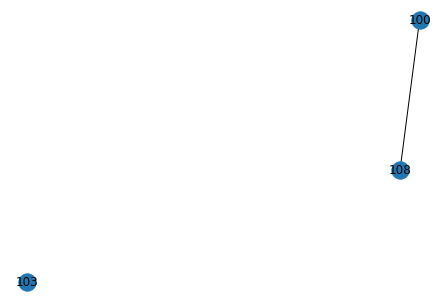

match_branches = [[100, 108]]
edges_to_delete (resolve crossover) = [[100, 103], [103, 108]]
edges_to_create (resolve crossover) = [[100, 108]]
Rejecting creating edge [100, 108] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([100, 103]), array([100, 108]), array([103, 108])]
edges_to_create = []
Number of connected components = 8
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 42, 43, 46, 47, 49, 51, 85, 91, 102}
Comp 1 = {74, 68, 71, 87}
Comp 2 = {128, 129, 130, 131, 33, 36, 38, 39, 40, 41, 44, 45, 48, 50, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 72, 73, 75, 76, 77, 78, 81, 82, 83, 84, 86, 89, 90, 92, 93, 94, 95, 96, 97, 99, 106, 107, 109, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127}
Comp 3 = {132, 133, 134, 135, 136, 138, 139, 140, 141, 143, 144, 145, 146, 147, 149, 150, 152, 153, 154, 155

  Edge: [100 108]: curr_angle = 18.09
  Edge: [108 148]: curr_angle = 35.86
  Edge: [148 151]: curr_angle = 25.92
  Edge: [151 160]: curr_angle = 34.32
  Edge: [160 161]: curr_angle = 43.47

Total time for doubling_back = 0.5177667140960693

Attempting the width jump check (attempting from both sides)
  Edge: [100 108]: jump = 217.39
Adding error edge [100 108] because width jump was 217.38537748442985
  Edge: [108 148]: jump = 164.46
  Edge: [148 151]: jump = 6.26
  Edge: [151 160]: jump = 154.71
  Edge: [160 161]: jump = 277.29
Adding error edge [160 161] because width jump was 277.29081094092385
Total time for width = 0.5036873817443848
Path starting at 100 had err_edges: [[100, 108], [160, 161]]
  Edge: [161 160]: jump = -277.29
  Edge: [160 151]: jump = -154.71
  Edge: [151 148]: jump = -6.26
  Edge: [148 108]: jump = -164.46
  Edge: [108 100]: jump = -217.39
Total time for width = 0.5253193378448486
Path starting at 161 had err_edges: []
first_error_sizes = [217.38537748442985, -

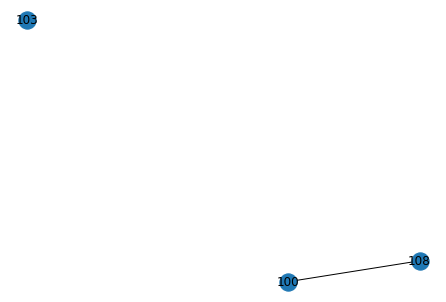

match_branches = [[100, 108]]
edges_to_delete (resolve crossover) = [[100, 103], [103, 108]]
edges_to_create (resolve crossover) = [[100, 108]]
Rejecting creating edge [100, 108] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([100, 103]), array([100, 108]), array([103, 108])]
edges_to_create = []
Number of connected components = 8
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 42, 43, 46, 47, 49, 51, 85, 91, 102}
Comp 1 = {74, 68, 71, 87}
Comp 2 = {128, 129, 130, 131, 33, 36, 38, 39, 40, 41, 44, 45, 48, 50, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 72, 73, 75, 76, 77, 78, 81, 82, 83, 84, 86, 89, 90, 92, 93, 94, 95, 96, 97, 99, 106, 107, 109, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127}
Comp 3 = {132, 133, 134, 135, 136, 138, 139, 140, 141, 143, 144, 145, 146, 147, 149, 150, 152, 153, 154, 155

  Edge: [101 103]: curr_angle = 56.79
  Edge: [103 104]: curr_angle = 43.39
  Edge: [104 111]: curr_angle = 28.0
  Edge: [111 145]: curr_angle = 65.95
  Edge: [145 138]: curr_angle = 29.93
  Edge: [138 132]: curr_angle = 20.3
  Edge: [132 139]: curr_angle = 21.86
  Edge: [139 135]: curr_angle = 11.8
  Edge: [135 133]: curr_angle = 10.19
  Edge: [133 134]: curr_angle = 13.62

Total time for doubling_back = 1.3288445472717285

Attempting the width jump check (attempting from both sides)
  Edge: [101 103]: jump = 444.69
Adding error edge [101 103] because width jump was 444.6940417676473
  Edge: [103 104]: jump = -427.43
  Edge: [104 111]: jump = 108.98
  Edge: [111 145]: jump = 49.52
  Edge: [145 138]: jump = 109.52
  Edge: [138 132]: jump = 22.13
  Edge: [132 139]: jump = 118.17
  Edge: [139 135]: jump = -20.33
  Edge: [135 133]: jump = 350.27
Adding error edge [135 133] because width jump was 350.26588438950193
  Edge: [133 134]: jump = 75.54
Total time for width = 1.1424987316131592
P

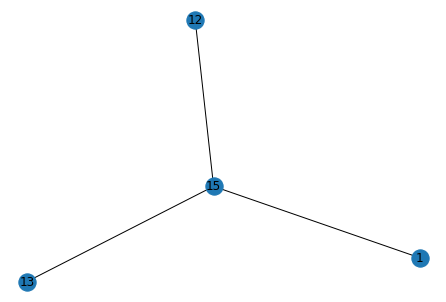

match_branches = [[13, 15]]
edges_to_delete (resolve crossover) = [[1, 12], [1, 13], [1, 15], [12, 13], [12, 15]]
edges_to_create (resolve crossover) = [[13, 15]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 12], [1, 13], [1, 15], [12, 13], [12, 15]]
edges_to_create = [[13, 15]]
Number of connected components = 7
Comp 0 = {0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 21, 22, 29, 30, 31}
Comp 1 = {1}
Comp 2 = {2, 12, 16, 18, 19, 20, 23, 24, 25, 26, 27, 28, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137}
Comp 3 = {14}
Comp 4 = {45}
Comp 5 = {47}
Comp 6

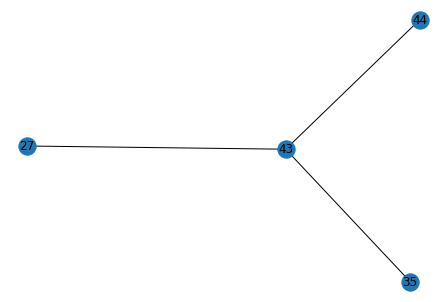

match_branches = [[27, 43], [35, 44]]
edges_to_delete (resolve crossover) = [[27, 35], [27, 44], [35, 43], [43, 44]]
edges_to_create (resolve crossover) = [[27, 43], [35, 44]]
curr_limb.deleted_edges 5 =[[1, 12], [1, 13], [1, 15], [12, 13], [12, 15]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[27, 35], [27, 44], [35, 43], [43, 44]]
edges_to_create = [[27, 43], [35, 44]]
Number of connected components = 8
Comp 0 = {0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 21, 22, 29, 30, 31}
Comp 1 = {1}
Comp 2 = {2, 12, 16, 18, 19, 20, 23, 24, 25, 26, 27, 28, 32, 33, 34, 36, 38, 39, 40, 41, 42, 43, 46, 48, 49, 50, 51, 52, 53, 55, 56, 57, 59, 60, 61, 63, 64, 65, 66, 68, 69, 70, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 94, 95, 97, 98}
Comp 3 = {128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 35, 37, 44, 58, 62, 67, 71, 77, 90, 91, 92, 93, 96, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 12

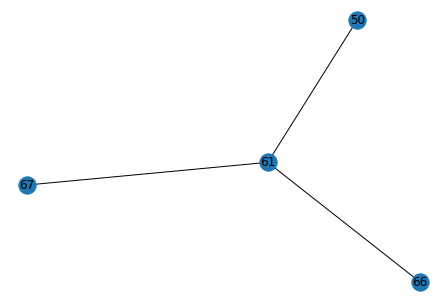

match_branches = [[50, 67], [61, 66]]
edges_to_delete (resolve crossover) = [[50, 61], [50, 66], [61, 67], [66, 67]]
edges_to_create (resolve crossover) = [[50, 67], [61, 66]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[50, 61], [50, 66], [61, 67], [66, 67]]
edges_to_create = [[50, 67], [61, 66]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 43, 44, 47, 48, 51, 52, 53, 59, 60, 61, 62, 66, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
Comp 1 = {31, 39, 40, 41, 42, 45, 46, 49, 50, 54, 55, 56, 57, 58, 63, 64, 65, 67, 68, 69, 70, 71, 72}
curr_limb_copy.deleted_edges = [[50, 61], [50, 66], [61, 67], [66, 67]]
curr_limb_copy.created_edges = [[50, 67], [61, 66]]
After get best cut: cut_edges = [[50, 61], [50, 66], [61, 67], [66, 67]], added_edges =

  Edge: [27 26]: curr_angle = 31.22
  Edge: [26 24]: curr_angle = 4.02
  Edge: [24 18]: curr_angle = 26.28
  Edge: [18 16]: curr_angle = 16.21
  Edge: [16 17]: curr_angle = 16.33
  Edge: [17 14]: curr_angle = 25.76
  Edge: [14 15]: curr_angle = 21.02
  Edge: [15 23]: curr_angle = 3.06
  Edge: [23 20]: curr_angle = 30.32
  Edge: [20 47]: curr_angle = 29.67
  Edge: [47 62]: curr_angle = 47.63
  Edge: [62 75]: curr_angle = 6.58
  Edge: [75 78]: curr_angle = 10.46
  Edge: [78 80]: curr_angle = 12.51
  Edge: [80 82]: curr_angle = 28.18
  Edge: [82 84]: curr_angle = 35.88
  Edge: [84 86]: curr_angle = 40.26

Total time for doubling_back = 1.424933671951294

Attempting the width jump check (attempting from both sides)
  Edge: [27 26]: jump = -208.96
  Edge: [26 24]: jump = -77.4
  Edge: [24 18]: jump = 48.84
  Edge: [18 16]: jump = -50.84
  Edge: [16 17]: jump = -79.02
  Edge: [17 14]: jump = -43.39
  Edge: [14 15]: jump = -99.37
  Edge: [15 23]: jump = -105.91
  Edge: [23 20]: jump = -151.41

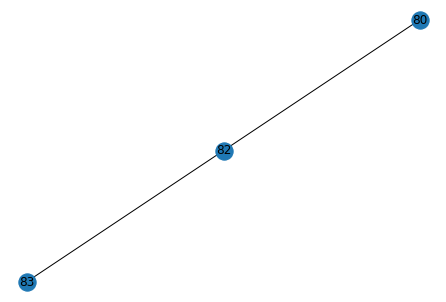

match_branches = [[80, 82]]
edges_to_delete (resolve crossover) = [[80, 83], [82, 83]]
edges_to_create (resolve crossover) = [[80, 82]]
Rejecting creating edge [80, 82] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([80, 82]), array([80, 83]), array([82, 83])]
edges_to_create = []
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 37, 38, 43, 44, 47, 48, 51, 52, 59, 60, 61, 62, 66, 75, 76, 78, 79, 80, 96, 97, 98, 99, 100}
Comp 1 = {31, 39, 40, 41, 42, 45, 46, 49, 50, 54, 55, 56, 57, 58, 63, 64, 65, 67, 68, 69, 70, 71, 72}
Comp 2 = {34, 73, 74, 77, 81, 82, 84, 85, 86, 53, 88}
Comp 3 = {83, 87, 89, 90, 91, 92, 93, 94, 95}
curr_limb_copy.deleted_edges = [[50, 61], [50, 66], [61, 67], [66, 67], array([80, 82]), array([80, 83]), array([82, 83])]
curr_limb_copy.created_edges = [[50, 67], [61, 66]]
After get best cut: 

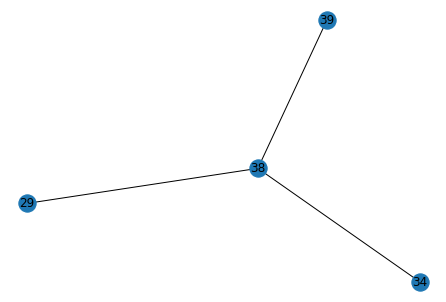

match_branches = [[29, 38]]
edges_to_delete (resolve crossover) = [[29, 34], [29, 39], [34, 38], [34, 39], [38, 39]]
edges_to_create (resolve crossover) = [[29, 38]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[29, 34], [29, 39], [34, 38], [34, 39], [38, 39]]
edges_to_create = [[29, 38]]
Number of connected components = 8
Comp 0 = {0, 1, 4, 5, 7, 8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 23, 24, 25, 26, 28, 30, 31, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128}
Comp 1 = {29, 38}
Comp 2 = {32, 33, 34, 3, 2, 6, 9, 15, 20, 21, 22, 27}
Comp 3 = {63}
Comp 4 = {100}
Comp 5 = {101}
Comp 6 = {102}
Comp 7 = {104}
curr_limb_copy.delete

  Edge: [33 34]: curr_angle = 71.98
  Edge: [34 39]: curr_angle = 22.7
  Edge: [39 45]: curr_angle = 29.21
  Edge: [45 47]: curr_angle = 118.28
  Edge: [47 43]: curr_angle = 8.33
  Edge: [43 40]: curr_angle = 35.32

Total time for doubling_back = 0.357344388961792
There were 1 edges that passed doubling back threshold of 100
Winning edge [45 47] had a doubling back of 118.2763833474905
***inside resolve crossover!!!!****
coordinate_branches = [45, 47, 48]
45 = red
47 = aqua
48 = purple
Angle between 45 and 47 = 85.34 
Angle between 45 and 48 = 79.11 
Angle between 47 and 48 = 18.37 
Final Matches = [[47, 48]]
matched_branches_revised = [[47, 48]]
Original graph


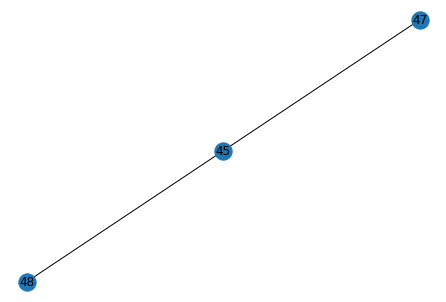

match_branches = [[47, 48]]
edges_to_delete (resolve crossover) = [[45, 47], [45, 48]]
edges_to_create (resolve crossover) = [[47, 48]]
edges_to_delete (cut_limb_network) = [array([45, 47]), array([45, 48])]
edges_to_create = [[47, 48]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 45}
Comp 1 = {35, 36, 40, 41, 42, 43, 44, 46, 47, 48}
curr_limb_copy.deleted_edges = [array([45, 47]), array([45, 48])]
curr_limb_copy.created_edges = [[47, 48]]
After get best cut: cut_edges = [array([45, 47]), array([45, 48])], added_edges = [[47, 48]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: 

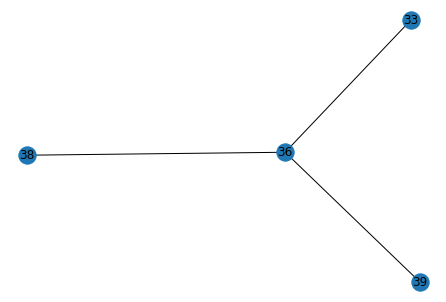

match_branches = [[36, 38], [33, 39]]
edges_to_delete (resolve crossover) = [[33, 36], [33, 38], [36, 39], [38, 39]]
edges_to_create (resolve crossover) = [[36, 38], [33, 39]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 37 because skeletal distance was 413.6939166009399 and threshold was 2500
Skipping endnode 39 because skeletal distance was 1972.0505865139216 and threshold was 2500
Could not used the revised endnodes path because empty
skip_nodes = []
edges_to_delete (cut_limb_network) = [[33, 36], [33, 38], [36, 39], [38, 39]]
edges_to_create = [[36, 38], [33, 39]]
Number of connected components = 1
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.0, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}
curr_limb_copy.deleted_edges = [[33, 36], [33, 38], [36, 39], [38, 39]]
curr_limb_copy.created_edges = [[36, 38], [33, 39]]
After get best cut: cut_edges = [[33, 36], [33, 38], [36, 39], [38, 39]], added_edges = [[36, 38], [33

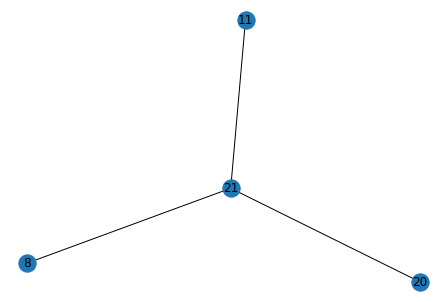

match_branches = [[8, 21]]
edges_to_delete (resolve crossover) = [[8, 11], [8, 20], [11, 20], [11, 21], [20, 21]]
edges_to_create (resolve crossover) = [[8, 21]]
curr_limb.deleted_edges 5 =[[33, 36], [33, 38], [36, 39], [38, 39]]
Skipping endnode 37 because skeletal distance was 413.6939166009399 and threshold was 2500
Skipping endnode 39 because skeletal distance was 1972.0505865139216 and threshold was 2500
skip_nodes = [37, 39]
edges_to_delete (cut_limb_network) = [[8, 11], [8, 20], [11, 20], [11, 21], [20, 21]]
edges_to_create = [[8, 21]]
Number of connected components = 1
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.0, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}
curr_limb_copy.deleted_edges = [[33, 36], [33, 38], [36, 39], [38, 39], [8, 11], [8, 20], [11, 20], [11, 21], [20, 21]]
curr_limb_copy.created_edges = [[36, 38], [33, 39], [8, 21]]
After get best cut: cut_edges = [[8, 11], [8, 20], [11, 20], [11, 21], [2

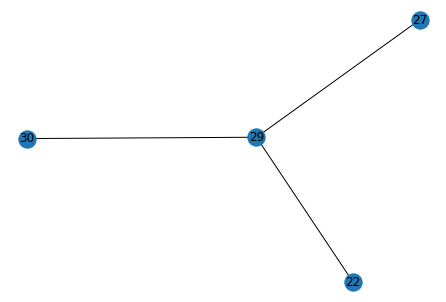

match_branches = [[27, 29]]
edges_to_delete (resolve crossover) = [[22, 27], [22, 29], [22, 30], [27, 30], [29, 30]]
edges_to_create (resolve crossover) = [[27, 29]]
curr_limb.deleted_edges 5 =[[33, 36], [33, 38], [36, 39], [38, 39], [8, 11], [8, 20], [11, 20], [11, 21], [20, 21]]
Skipping endnode 37 because skeletal distance was 413.6939166009399 and threshold was 2500
Skipping endnode 39 because skeletal distance was 1972.0505865139216 and threshold was 2500
skip_nodes = [37, 39]
edges_to_delete (cut_limb_network) = [[22, 27], [22, 29], [22, 30], [27, 30], [29, 30]]
edges_to_create = [[27, 29]]
Number of connected components = 4
Comp 0 = {1, 3, 4, 6, 7, 8, 12, 13, 15, 16, 18, 19, 21, 24, 26, 27, 29, 32, 34, 35, 36, 37, 38}
Comp 1 = {0, 33, 2, 5, 39, 9, 10.0, 11, 14, 17, 20, 23, 25, 30, 31}
Comp 2 = {22}
Comp 3 = {28}
curr_limb_copy.deleted_edges = [[33, 36], [33, 38], [36, 39], [38, 39], [8, 11], [8, 20], [11, 20], [11, 21], [20, 21], [22, 27], [22, 29], [22, 30], [27, 30], [29, 30]]

  Edge: [11  7]: curr_angle = 14.38
  Edge: [7 6]: curr_angle = 50.42
  Edge: [6 2]: curr_angle = 13.91
  Edge: [2 3]: curr_angle = 121.47
  Edge: [ 3 12]: curr_angle = 40.28

Total time for doubling_back = 0.45403528213500977
There were 1 edges that passed doubling back threshold of 100
Winning edge [2 3] had a doubling back of 121.47159215881238
***inside resolve crossover!!!!****
coordinate_branches = [1, 2, 3]
1 = red
2 = aqua
3 = purple
Angle between 1 and 2 = 79.06 
Angle between 1 and 3 = 36.53 
Angle between 2 and 3 = 112.03 
Final Matches = []
matched_branches_revised = []
Original graph


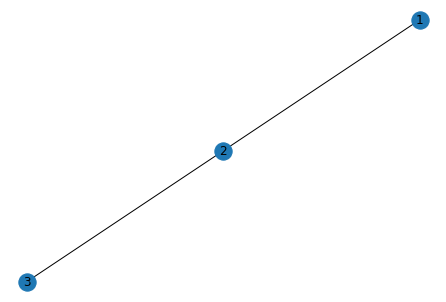

match_branches = []
edges_to_delete (resolve crossover) = [[1, 2], [1, 3], [2, 3]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([1, 2]), array([1, 3]), array([2, 3])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {0, 2, 4, 5, 6, 7, 11}
Comp 1 = {1}
Comp 2 = {3, 8, 9, 10, 12, 13, 14}
curr_limb_copy.deleted_edges = [array([1, 2]), array([1, 3]), array([2, 3])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([1, 2]), array([1, 3]), array([2, 3])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([ 0,  2,  4,  5,  6,  7, 11]), array([1]), array([ 3,  8,  9, 10, 12, 13, 14])]


 ------ Total time for Splitting 8646911

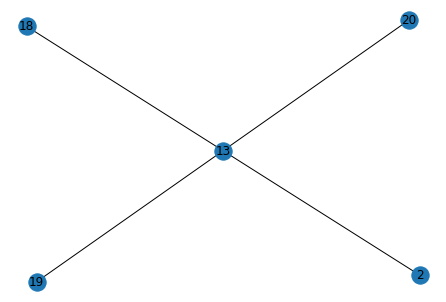

match_branches = [[13, 18]]
edges_to_delete (resolve crossover) = [[2, 13], [2, 18], [2, 19], [2, 20], [13, 19], [13, 20], [18, 19], [18, 20], [19, 20]]
edges_to_create (resolve crossover) = [[13, 18]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[2, 13], [2, 18], [2, 19], [2, 20], [13, 19], [13, 20], [18, 19], [18, 20], [19, 20]]
edges_to_create = [[13, 18]]
Number of connected components = 3
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105.0, 106, 107, 108, 109, 110, 111, 112, 113}
Comp 1 = {2}
Comp 2 = {19}
curr_limb_copy.deleted_edges = [[2, 13], [2, 18], [2, 19], [2, 20], [13,

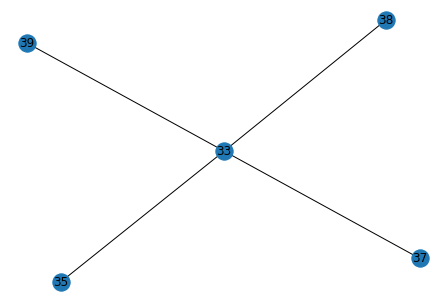

match_branches = [[33, 38], [35, 37]]
edges_to_delete (resolve crossover) = [[33, 35], [33, 37], [33, 39], [35, 38], [35, 39], [37, 38], [37, 39], [38, 39]]
edges_to_create (resolve crossover) = [[33, 38], [35, 37]]
curr_limb.deleted_edges 5 =[[2, 13], [2, 18], [2, 19], [2, 20], [13, 19], [13, 20], [18, 19], [18, 20], [19, 20]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[33, 35], [33, 37], [33, 39], [35, 38], [35, 39], [37, 38], [37, 39], [38, 39]]
edges_to_create = [[33, 38], [35, 37]]
Number of connected components = 5
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 31, 32, 35, 36, 37, 40, 41, 46, 47, 53, 54}
Comp 1 = {2}
Comp 2 = {19}
Comp 3 = {20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 38, 42, 43, 44, 45, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105.0, 106,

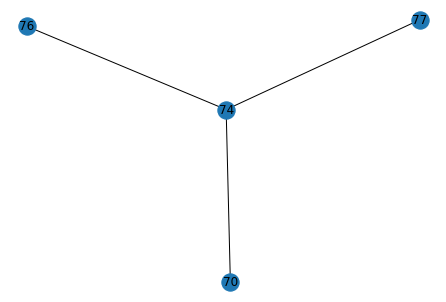

match_branches = [[74, 76], [70, 77]]
edges_to_delete (resolve crossover) = [[70, 74], [70, 76], [74, 77], [76, 77]]
edges_to_create (resolve crossover) = [[74, 76], [70, 77]]
curr_limb.deleted_edges 5 =[[2, 13], [2, 18], [2, 19], [2, 20], [13, 19], [13, 20], [18, 19], [18, 20], [19, 20], [33, 35], [33, 37], [33, 39], [35, 38], [35, 39], [37, 38], [37, 39], [38, 39]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[70, 74], [70, 76], [74, 77], [76, 77]]
edges_to_create = [[74, 76], [70, 77]]
Number of connected components = 7
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 31, 32, 35, 36, 37, 40, 41, 46, 47, 53, 54}
Comp 1 = {2}
Comp 2 = {19}
Comp 3 = {20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 38, 42, 43, 44, 45, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105.0, 106, 107, 108, 109, 110,

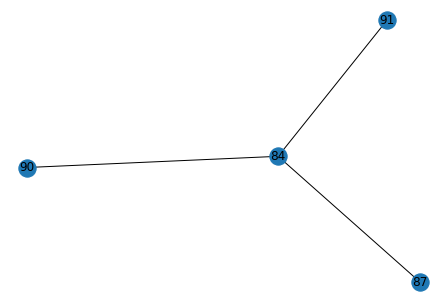

match_branches = [[84, 87]]
edges_to_delete (resolve crossover) = [[84, 90], [84, 91], [87, 90], [87, 91], [90, 91]]
edges_to_create (resolve crossover) = [[84, 87]]
curr_limb.deleted_edges 5 =[[2, 13], [2, 18], [2, 19], [2, 20], [13, 19], [13, 20], [18, 19], [18, 20], [19, 20], [33, 35], [33, 37], [33, 39], [35, 38], [35, 39], [37, 38], [37, 39], [38, 39], [70, 74], [70, 76], [74, 77], [76, 77]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[84, 90], [84, 91], [87, 90], [87, 91], [90, 91]]
edges_to_create = [[84, 87]]
Number of connected components = 9
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 31, 32, 35, 36, 37, 40, 41, 46, 47, 53, 54}
Comp 1 = {2}
Comp 2 = {19}
Comp 3 = {20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 38, 42, 43, 44, 45, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 72, 73, 74, 75, 76, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 92, 93, 100, 101}
Comp 4 = {39}
Comp 5 = {63, 77, 70, 71}
Comp 6 = {90

  Edge: [29 27]: curr_angle = 27.48
  Edge: [27 24]: curr_angle = 4.23
  Edge: [24 25]: curr_angle = 5.48
  Edge: [25 26]: curr_angle = 26.64
  Edge: [26 34]: curr_angle = 52.97
  Edge: [34 44]: curr_angle = 15.14
  Edge: [44 49]: curr_angle = 20.59
  Edge: [49 60]: curr_angle = 32.39
  Edge: [60 64]: curr_angle = 25.55
  Edge: [64 67]: curr_angle = 15.7
  Edge: [67 68]: curr_angle = 26.28
  Edge: [68 72]: curr_angle = 23.36
  Edge: [72 74]: curr_angle = 16.64
  Edge: [74 76]: curr_angle = 20.82
  Edge: [76 78]: curr_angle = 18.6
  Edge: [78 81]: curr_angle = 3.21
  Edge: [81 84]: curr_angle = 24.64
  Edge: [84 87]: curr_angle = 27.63

Total time for doubling_back = 2.039599657058716

Attempting the width jump check (attempting from both sides)
  Edge: [29 27]: jump = 194.88
  Edge: [27 24]: jump = -147.58
  Edge: [24 25]: jump = -143.47
  Edge: [25 26]: jump = 31.28
  Edge: [26 34]: jump = -410.29
  Edge: [34 44]: jump = 105.38
  Edge: [44 49]: jump = 151.9
  Edge: [49 60]: jump = 82.

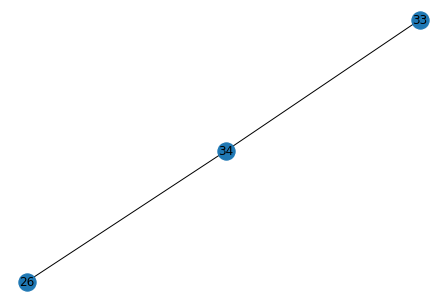

match_branches = []
edges_to_delete (resolve crossover) = [[26, 33], [26, 34], [33, 34]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([26, 33]), array([26, 34]), array([33, 34])]
edges_to_create = []
Number of connected components = 11
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 31, 32, 35, 36, 37, 40, 41, 46, 47, 53, 54}
Comp 1 = {2}
Comp 2 = {19}
Comp 3 = {20, 21, 24, 25, 26, 27, 28, 29, 30}
Comp 4 = {33, 38}
Comp 5 = {34, 42, 43, 44, 45, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 72, 73, 74, 75, 76, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 92, 93, 100, 101}
Comp 6 = {39}
Comp 7 = {63, 77, 70, 71}
Comp 8 = {90}
Comp 9 = {96, 97, 98, 99, 102, 103, 104, 105.0, 106, 107, 108, 109, 110, 111, 80, 112, 113, 91, 94, 95}
Comp 10 = {89}
curr_limb_copy.deleted_edges = [[2, 13], [2, 18], [2, 19], [2, 20], [13, 19], [13, 20], [18, 19], [18, 20], [19, 20], [33, 35], [33, 37], [33, 39], [35

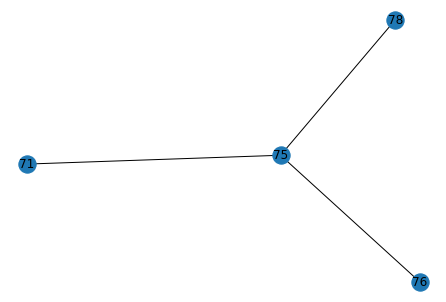

match_branches = []
edges_to_delete (resolve crossover) = [[71, 75], [71, 76], [71, 78], [75, 76], [75, 78], [76, 78]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
Skipping endnode 107 because skeletal distance was 2009.7210042248196 and threshold was 2500
skip_nodes = [107]
edges_to_delete (cut_limb_network) = [[71, 75], [71, 76], [71, 78], [75, 76], [75, 78], [76, 78]]
edges_to_create = []
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 77, 78, 79, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,

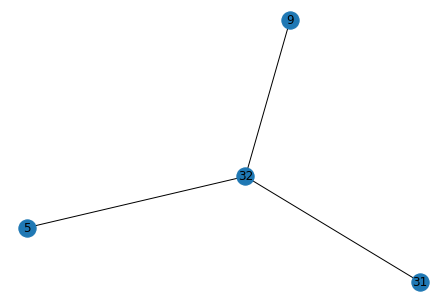

match_branches = [[5, 31], [9, 32]]
edges_to_delete (resolve crossover) = [[5, 9], [5, 32], [9, 31], [31, 32]]
edges_to_create (resolve crossover) = [[5, 31], [9, 32]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[5, 9], [5, 32], [9, 31], [31, 32]]
edges_to_create = [[5, 31], [9, 32]]
Number of connected components = 3
Comp 0 = {64, 5, 40, 57, 60, 49, 52, 21, 54, 24, 56, 25, 58, 59, 31, 61, 62, 63}
Comp 1 = {0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 53, 55}
Comp 2 = {29}
curr_limb_copy.deleted_edges = [[5, 9], [5, 32], [9, 31], [31, 32]]
curr_limb_copy.created_edges = [[5, 31], [9, 32]]
After get best cut: cut_edges = [[5, 9], [5, 32], [9, 31], [31, 32]], added_edges = [[5, 31], [9, 32]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRE

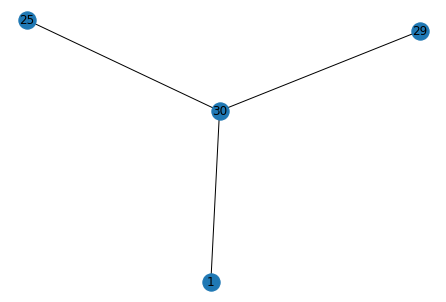

match_branches = [[1, 29]]
edges_to_delete (resolve crossover) = [[1, 25], [1, 30], [25, 29], [25, 30], [29, 30]]
edges_to_create (resolve crossover) = [[1, 29]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 25], [1, 30], [25, 29], [25, 30], [29, 30]]
edges_to_create = [[1, 29]]
Number of connected components = 4
Comp 0 = {0, 3, 13, 17, 20, 22, 23, 30, 31, 34, 35, 36, 39, 40, 42, 43, 44, 45, 46, 53, 54, 55, 58, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 79, 81, 82, 83, 84, 85, 86, 90, 91, 93}
Comp 1 = {1, 6, 21, 24, 29, 37, 38, 41, 47, 48, 49, 50, 56, 57, 59, 60, 69, 77, 78, 96, 97, 99, 100, 101, 102}
Comp 2 = {2, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 25, 26, 28, 32, 33, 51, 52, 80, 87, 88, 89, 92, 94, 95, 98}
Comp 3 = {27}
curr_limb_copy.deleted_edges = [[1, 25], [1, 30], [25, 29], [25, 30], [29, 30]]
curr_limb_copy.created_edges = [[1, 29]]
After get best cut: cut_edges = [[1, 25], [1, 30], [25, 29], [25, 30], [29, 3

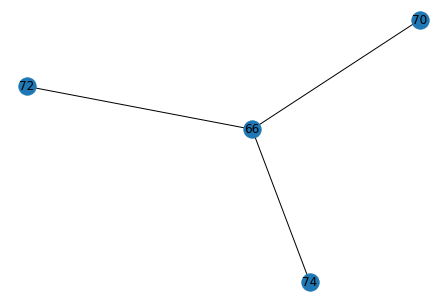

match_branches = []
edges_to_delete (resolve crossover) = [[66, 70], [66, 72], [66, 74], [70, 72], [70, 74], [72, 74]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[[1, 25], [1, 30], [25, 29], [25, 30], [29, 30]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[66, 70], [66, 72], [66, 74], [70, 72], [70, 74], [72, 74]]
edges_to_create = []
Number of connected components = 7
Comp 0 = {66}
Comp 1 = {0, 3, 13, 17, 20, 22, 23, 30, 31, 34, 35, 36, 39, 40, 42, 43, 44, 45, 46, 53, 54, 55, 58, 61, 62, 63, 64, 65, 67, 68, 70, 71, 73, 75, 76, 79, 81, 82, 83, 84, 85, 86, 90, 91, 93}
Comp 2 = {72}
Comp 3 = {74}
Comp 4 = {1, 6, 21, 24, 29, 37, 38, 41, 47, 48, 49, 50, 56, 57, 59, 60, 69, 77, 78, 96, 97, 99, 100, 101, 102}
Comp 5 = {2, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 25, 26, 28, 32, 33, 51, 52, 80, 87, 88, 89, 92, 94, 95, 98}
Comp 6 = {27}
curr_limb_copy.deleted_edges = [[1, 25], [1, 30], [25, 29], [25, 30], [29, 30], [66, 70], [66, 72], [66, 74], [70, 72],

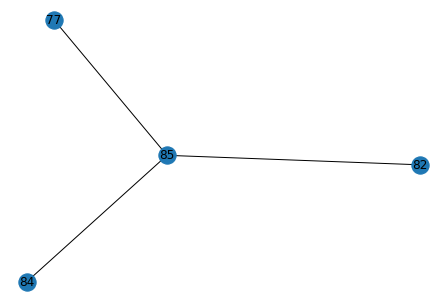

match_branches = [[77, 85], [82, 84]]
edges_to_delete (resolve crossover) = [[77, 82], [77, 84], [82, 85], [84, 85]]
edges_to_create (resolve crossover) = [[77, 85], [82, 84]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[77, 82], [77, 84], [82, 85], [84, 85]]
edges_to_create = [[77, 85], [82, 84]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 84, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 103, 104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,

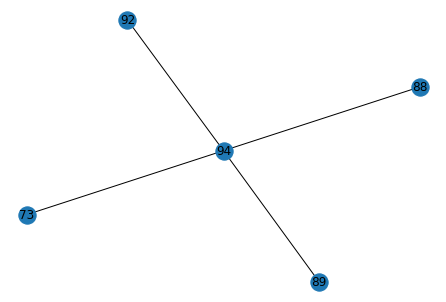

match_branches = [[88, 94], [73, 92]]
edges_to_delete (resolve crossover) = [[73, 88], [73, 89], [73, 94], [88, 89], [88, 92], [89, 92], [89, 94], [92, 94]]
edges_to_create (resolve crossover) = [[88, 94], [73, 92]]
curr_limb.deleted_edges 5 =[[77, 82], [77, 84], [82, 85], [84, 85]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[73, 88], [73, 89], [73, 94], [88, 89], [88, 92], [89, 92], [89, 94], [92, 94]]
edges_to_create = [[88, 94], [73, 92]]
Number of connected components = 6
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 84, 86, 87, 88, 90, 92, 93, 94, 95, 96, 97, 98, 105, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 129, 130, 131, 132, 133, 134, 135, 136, 137, 

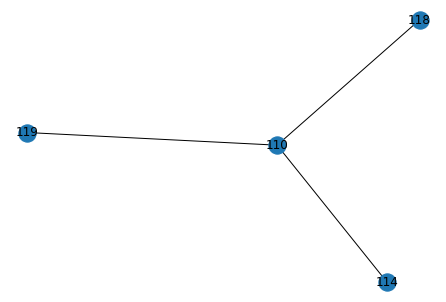

match_branches = [[114, 118]]
edges_to_delete (resolve crossover) = [[110, 114], [110, 118], [110, 119], [114, 119], [118, 119]]
edges_to_create (resolve crossover) = [[114, 118]]
curr_limb.deleted_edges 5 =[[77, 82], [77, 84], [82, 85], [84, 85], [73, 88], [73, 89], [73, 94], [88, 89], [88, 92], [89, 92], [89, 94], [92, 94]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[110, 114], [110, 118], [110, 119], [114, 119], [118, 119]]
edges_to_create = [[114, 118]]
Number of connected components = 9
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 84, 86, 87, 88, 90, 92, 93, 94, 95, 96, 97, 98, 108, 111, 112, 113, 115, 116, 119, 120, 123, 124, 125, 126, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,

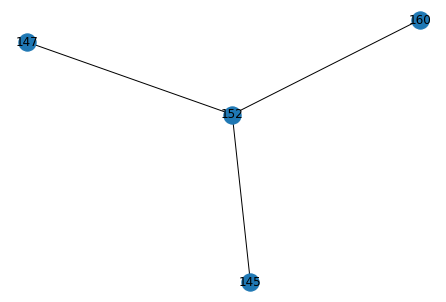

match_branches = [[147, 152]]
edges_to_delete (resolve crossover) = [[145, 147], [145, 152], [145, 160], [147, 160], [152, 160]]
edges_to_create (resolve crossover) = [[147, 152]]
curr_limb.deleted_edges 5 =[[77, 82], [77, 84], [82, 85], [84, 85], [73, 88], [73, 89], [73, 94], [88, 89], [88, 92], [89, 92], [89, 94], [92, 94], [110, 114], [110, 118], [110, 119], [114, 119], [118, 119]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[145, 147], [145, 152], [145, 160], [147, 160], [152, 160]]
edges_to_create = [[147, 152]]
Number of connected components = 11
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 84, 86, 87, 88, 90, 92, 93, 94, 95, 96, 97, 98, 108, 111, 112, 113, 115, 116, 119, 120, 123, 124, 125, 126, 131

  Edge: [126 108]: curr_angle = 31.35
  Edge: [108 232]: curr_angle = 94.83
  Edge: [232 111]: curr_angle = 105.23
  Edge: [111 112]: curr_angle = 19.58
  Edge: [112 141]: curr_angle = 100.78
  Edge: [141 151]: curr_angle = 16.38
  Edge: [151 159]: curr_angle = 84.84
  Edge: [159 152]: curr_angle = 165.32
  Edge: [152 147]: curr_angle = 22.27
  Edge: [147 142]: curr_angle = 18.32

Total time for doubling_back = 0.7655298709869385
There were 3 edges that passed doubling back threshold of 100
Winning edge [159 152] had a doubling back of 165.32061917396524
***inside resolve crossover!!!!****
coordinate_branches = [152, 158, 159]
152 = red
158 = aqua
159 = purple
Angle between 152 and 158 = 13.67 
Angle between 152 and 159 = 83.5 
Angle between 158 and 159 = 83.06 
Final Matches = [[152, 158]]
matched_branches_revised = [[152, 158]]
Original graph


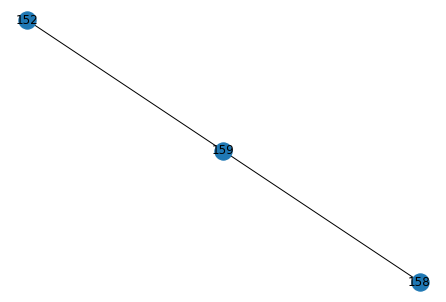

match_branches = [[152, 158]]
edges_to_delete (resolve crossover) = [[152, 159], [158, 159]]
edges_to_create (resolve crossover) = [[152, 158]]
edges_to_delete (cut_limb_network) = [array([152, 159]), array([158, 159])]
edges_to_create = [[152, 158]]
Number of connected components = 12
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 84, 86, 87, 88, 90, 92, 93, 94, 95, 97, 98, 108, 111, 112, 113, 115, 116, 119, 120, 123, 124, 125, 126, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 143, 146, 148, 149, 150, 151, 156, 157, 159, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 205, 206

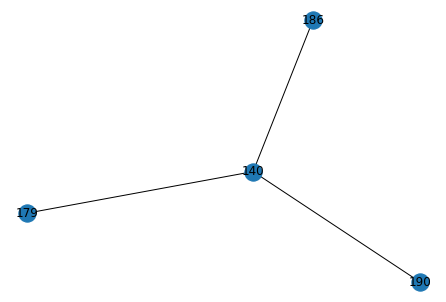

match_branches = [[140, 186]]
edges_to_delete (resolve crossover) = [[140, 179], [140, 190], [179, 186], [179, 190], [186, 190]]
edges_to_create (resolve crossover) = [[140, 186]]
curr_limb.deleted_edges 5 =[[77, 82], [77, 84], [82, 85], [84, 85], [73, 88], [73, 89], [73, 94], [88, 89], [88, 92], [89, 92], [89, 94], [92, 94], [110, 114], [110, 118], [110, 119], [114, 119], [118, 119], [145, 147], [145, 152], [145, 160], [147, 160], [152, 160], array([152, 159]), array([158, 159])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[140, 179], [140, 190], [179, 186], [179, 190], [186, 190]]
edges_to_create = [[140, 186]]
Number of connected components = 15
Comp 0 = {161, 176, 179, 181, 184, 123}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 7

  Edge: [29 17]: curr_angle = 58.09
  Edge: [17 14]: curr_angle = 83.72
  Edge: [14 15]: curr_angle = 143.89
  Edge: [15 23]: curr_angle = 38.7
  Edge: [23 31]: curr_angle = 74.85
  Edge: [31 33]: curr_angle = 16.06
  Edge: [33 35]: curr_angle = 165.41

Total time for doubling_back = 0.5768768787384033
There were 2 edges that passed doubling back threshold of 100
Winning edge [33 35] had a doubling back of 165.40715519066808
***inside resolve crossover!!!!****
coordinate_branches = [32, 33, 35]
32 = red
33 = aqua
35 = purple
Angle between 32 and 33 = 77.47 
Angle between 32 and 35 = 76.21 
Angle between 33 and 35 = 28.63 
Final Matches = [[33, 35]]
matched_branches_revised = [[33, 35]]
Original graph


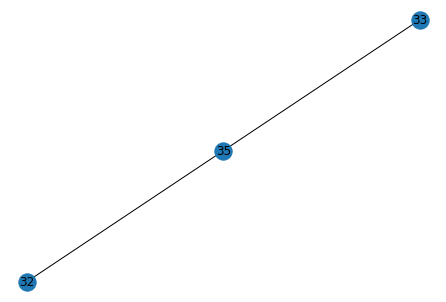

match_branches = [[33, 35]]
edges_to_delete (resolve crossover) = [[32, 33], [32, 35]]
edges_to_create (resolve crossover) = [[33, 35]]
Rejecting creating edge [33, 35] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([32, 33]), array([32, 35]), array([33, 35])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 36, 37, 38}
Comp 1 = {32, 3, 30}
Comp 2 = {35}
curr_limb_copy.deleted_edges = [array([32, 33]), array([32, 35]), array([33, 35])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([32, 33]), array([32, 35]), array([33, 35])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path s

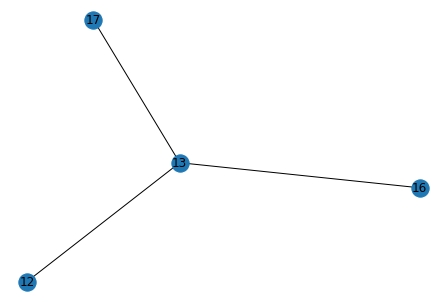

match_branches = [[13, 16], [12, 17]]
edges_to_delete (resolve crossover) = [[12, 13], [12, 16], [13, 17], [16, 17]]
edges_to_create (resolve crossover) = [[13, 16], [12, 17]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[12, 13], [12, 16], [13, 17], [16, 17]]
edges_to_create = [[13, 16], [12, 17]]
Number of connected components = 3
Comp 0 = {17, 10, 12, 14}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 16, 18, 19, 20}
Comp 2 = {15}
curr_limb_copy.deleted_edges = [[12, 13], [12, 16], [13, 17], [16, 17]]
curr_limb_copy.created_edges = [[13, 16], [12, 17]]
After get best cut: cut_edges = [[12, 13], [12, 16], [13, 17], [16, 17]], added_edges = [[13, 16], [12, 17]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of grap

  Edge: [0 1]: curr_angle = 83.57

Total time for doubling_back = 0.03558230400085449

Attempting the width jump check (attempting from both sides)
  Edge: [0 1]: jump = -138.51
Total time for width = 0.0089263916015625
Path starting at 0 had err_edges: []
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [1 0]: jump = 85.25
Total time for width = 0.015952587127685547
Path starting at 1 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2, 3, 4}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***


---- working on disconnecting 0 and 3
---- This disconnects S1_2 from S1_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL =

  Edge: [ 9 11]: curr_angle = 160.75

Total time for doubling_back = 0.067169189453125
There were 1 edges that passed doubling back threshold of 100
Winning edge [ 9 11] had a doubling back of 160.74714269782518
***inside resolve crossover!!!!****
coordinate_branches = [9, 10, 11]
9 = red
10 = aqua
11 = purple
Angle between 9 and 10 = 25.4 
Angle between 9 and 11 = 96.5 
Angle between 10 and 11 = 60.66 
Final Matches = [[9, 10]]
matched_branches_revised = [[9, 10]]
Original graph


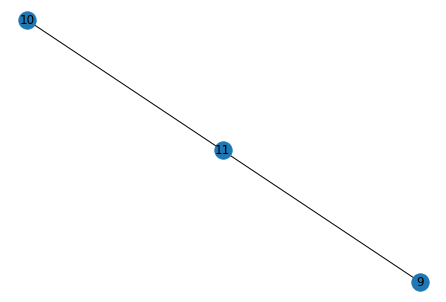

match_branches = [[9, 10]]
edges_to_delete (resolve crossover) = [[9, 11], [10, 11]]
edges_to_create (resolve crossover) = [[9, 10]]
edges_to_delete (cut_limb_network) = [array([ 9, 11]), array([10, 11])]
edges_to_create = [[9, 10]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73}
Comp 1 = {11}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11])]
curr_limb_copy.created_edges = [[9, 10]]
After get best cut: cut_edges = [array([ 9, 11]), array([10, 11])], added_edges = [[9, 10]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No vali

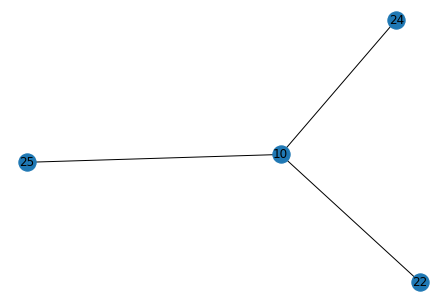

match_branches = [[10, 24]]
edges_to_delete (resolve crossover) = [[10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
edges_to_create (resolve crossover) = [[10, 24]]
curr_limb.deleted_edges 5 =[array([ 9, 11]), array([10, 11])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
edges_to_create = [[10, 24]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 17, 18, 19, 20, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73}
Comp 1 = {27, 44, 45, 13, 12, 16, 22, 23, 58, 59}
Comp 2 = {25}
Comp 3 = {11}
Comp 4 = {21}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
curr_limb_copy.created_edges = [[9, 10], [10, 24]]
After get best cut: cut_edges = [[10, 22], [10, 25], [22, 24], [22, 25], [24, 25]], added_edges = [[1

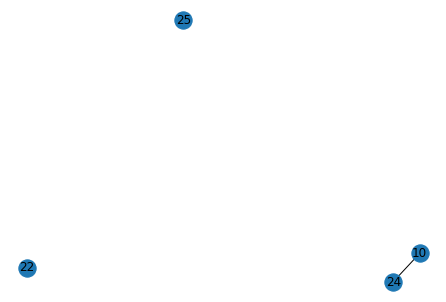

match_branches = [[10, 24]]
edges_to_delete (resolve crossover) = [[10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
edges_to_create (resolve crossover) = [[10, 24]]
curr_limb.deleted_edges 5 =[array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
edges_to_create = [[10, 24]]
Number of connected components = 6
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 17, 18, 19, 20, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73}
Comp 1 = {27, 44, 45, 13, 12, 16, 22, 23, 58, 59}
Comp 2 = {25}
Comp 3 = {11}
Comp 4 = {21}
Comp 5 = {48}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
curr_limb_copy.created_edges = [[9, 10], [

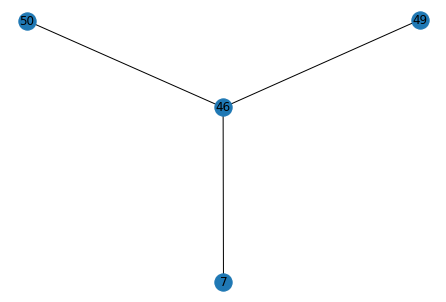

match_branches = [[46, 49]]
edges_to_delete (resolve crossover) = [[7, 46], [7, 49], [7, 50], [46, 50], [49, 50]]
edges_to_create (resolve crossover) = [[46, 49]]
curr_limb.deleted_edges 5 =[array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [10, 22], [10, 25], [22, 24], [22, 25], [24, 25]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[7, 46], [7, 49], [7, 50], [46, 50], [49, 50]]
edges_to_create = [[46, 49]]
Number of connected components = 8
Comp 0 = {0, 1, 2, 3, 4, 6, 9, 10, 14, 15, 17, 18, 24, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 46, 49}
Comp 1 = {5, 7, 8, 19, 20, 26, 47, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73}
Comp 2 = {50}
Comp 3 = {27, 44, 45, 13, 12, 16, 22, 23, 58, 59}
Comp 4 = {25}
Comp 5 = {11}
Comp 6 = {21}
Comp 7 = {48}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [10, 22], [10, 25], [22, 24]

  Edge: [ 9 10]: curr_angle = 2.11
  Edge: [10 24]: curr_angle = 8.72
  Edge: [24 30]: curr_angle = 25.2
  Edge: [30 33]: curr_angle = 10.33
  Edge: [33 34]: curr_angle = 20.43
  Edge: [34 32]: curr_angle = 19.6
  Edge: [32 36]: curr_angle = 17.1
  Edge: [36 37]: curr_angle = 27.92
  Edge: [37 39]: curr_angle = 30.15
  Edge: [39 41]: curr_angle = 12.89
  Edge: [41 46]: curr_angle = 14.38
  Edge: [46 49]: curr_angle = 5.85

Total time for doubling_back = 0.4425487518310547

Attempting the width jump check (attempting from both sides)
  Edge: [ 9 10]: jump = -70.56
  Edge: [10 24]: jump = 46.0
  Edge: [24 30]: jump = -2.26
  Edge: [30 33]: jump = 39.5
  Edge: [33 34]: jump = 48.99
  Edge: [34 32]: jump = -150.26
  Edge: [32 36]: jump = 33.56
  Edge: [36 37]: jump = 5.44
  Edge: [37 39]: jump = -166.72
  Edge: [39 41]: jump = 81.7
  Edge: [41 46]: jump = 31.51
  Edge: [46 49]: jump = 302.73
Adding error edge [46 49] because width jump was 302.7315359659574
Total time for width = 0.4208233

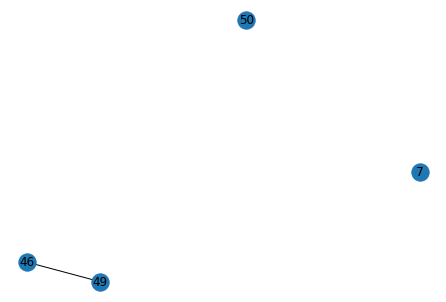

match_branches = [[46, 49]]
edges_to_delete (resolve crossover) = [[7, 46], [7, 49], [7, 50], [46, 50], [49, 50]]
edges_to_create (resolve crossover) = [[46, 49]]
Rejecting creating edge [46, 49] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([ 7, 46]), array([ 7, 49]), array([ 7, 50]), array([46, 49]), array([46, 50]), array([49, 50])]
edges_to_create = []
Number of connected components = 9
Comp 0 = {49}
Comp 1 = {5, 7, 8, 19, 20, 26, 47, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73}
Comp 2 = {0, 1, 2, 3, 4, 6, 9, 10, 14, 15, 17, 18, 24, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 46}
Comp 3 = {50}
Comp 4 = {27, 44, 45, 13, 12, 16, 22, 23, 58, 59}
Comp 5 = {25}
Comp 6 = {11}
Comp 7 = {21}
Comp 8 = {48}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [7, 46], [

  Edge: [ 9 10]: curr_angle = 2.11
  Edge: [10 24]: curr_angle = 8.72
  Edge: [24 30]: curr_angle = 25.2
  Edge: [30 33]: curr_angle = 10.33
  Edge: [33 34]: curr_angle = 20.43
  Edge: [34 32]: curr_angle = 19.6
  Edge: [32 36]: curr_angle = 17.1
  Edge: [36 37]: curr_angle = 27.92
  Edge: [37 39]: curr_angle = 30.15
  Edge: [39 41]: curr_angle = 12.89
  Edge: [41 46]: curr_angle = 14.38
  Edge: [46 49]: curr_angle = 5.85

Total time for doubling_back = 0.44344425201416016

Attempting the width jump check (attempting from both sides)
  Edge: [ 9 10]: jump = -70.56
  Edge: [10 24]: jump = 46.0
  Edge: [24 30]: jump = -2.26
  Edge: [30 33]: jump = 39.5
  Edge: [33 34]: jump = 48.99
  Edge: [34 32]: jump = -150.26
  Edge: [32 36]: jump = 33.56
  Edge: [36 37]: jump = 5.44
  Edge: [37 39]: jump = -166.72
  Edge: [39 41]: jump = 81.7
  Edge: [41 46]: jump = 31.51
  Edge: [46 49]: jump = 302.73
Adding error edge [46 49] because width jump was 302.7315359659574
Total time for width = 0.413065

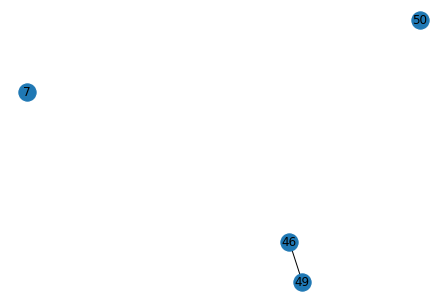

match_branches = [[46, 49]]
edges_to_delete (resolve crossover) = [[7, 46], [7, 49], [7, 50], [46, 50], [49, 50]]
edges_to_create (resolve crossover) = [[46, 49]]
Rejecting creating edge [46, 49] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([ 7, 46]), array([ 7, 49]), array([ 7, 50]), array([46, 49]), array([46, 50]), array([49, 50])]
edges_to_create = []
Number of connected components = 9
Comp 0 = {49}
Comp 1 = {5, 7, 8, 19, 20, 26, 47, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73}
Comp 2 = {0, 1, 2, 3, 4, 6, 9, 10, 14, 15, 17, 18, 24, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 46}
Comp 3 = {50}
Comp 4 = {27, 44, 45, 13, 12, 16, 22, 23, 58, 59}
Comp 5 = {25}
Comp 6 = {11}
Comp 7 = {21}
Comp 8 = {48}
curr_limb_copy.deleted_edges = [array([ 9, 11]), array([10, 11]), [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [10, 22], [10, 25], [22, 24], [22, 25], [24, 25], [7, 46], [

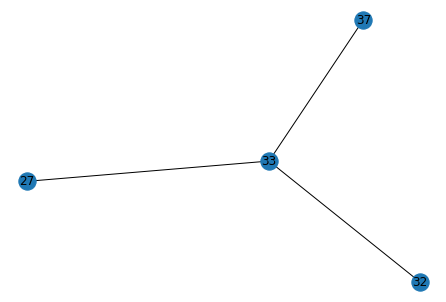

match_branches = [[27, 32]]
edges_to_delete (resolve crossover) = [[27, 33], [27, 37], [32, 33], [32, 37], [33, 37]]
edges_to_create (resolve crossover) = [[27, 32]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[27, 33], [27, 37], [32, 33], [32, 37], [33, 37]]
edges_to_create = [[27, 32]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 21, 22, 24, 26, 27, 28, 29, 30, 31, 32, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118}
Comp 1 = {33, 34, 6, 41, 10, 16, 17, 18, 19, 20, 52, 23, 25}
Comp 2 = {37}
curr_limb_copy.deleted_edges = [[27, 33], [27, 37], [32, 33], [32, 37], [33, 37]]
curr_limb_copy.created_edges = [[27, 32

  Edge: [21 22]: curr_angle = 19.81
  Edge: [22 26]: curr_angle = 16.69
  Edge: [26 36]: curr_angle = 17.65
  Edge: [36 39]: curr_angle = 27.8
  Edge: [39 47]: curr_angle = 26.17
  Edge: [47 43]: curr_angle = 143.94
  Edge: [43 31]: curr_angle = 58.73

Total time for doubling_back = 0.26162004470825195
There were 1 edges that passed doubling back threshold of 100
Winning edge [47 43] had a doubling back of 143.94402930425517
***inside resolve crossover!!!!****
coordinate_branches = [43, 46, 47]
43 = red
46 = aqua
47 = purple
Angle between 43 and 46 = 21.83 
Angle between 43 and 47 = 150.96 
Angle between 46 and 47 = 19.27 
Final Matches = [[43, 46], [46, 47]]
matched_branches_revised = [[46, 47]]
Original graph


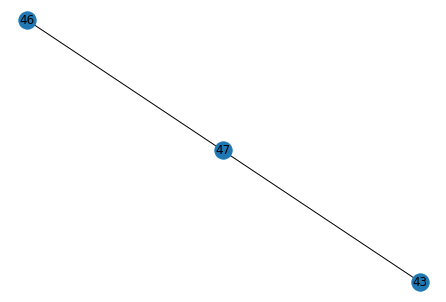

match_branches = [[46, 47]]
edges_to_delete (resolve crossover) = [[43, 46], [43, 47]]
edges_to_create (resolve crossover) = [[46, 47]]
edges_to_delete (cut_limb_network) = [array([43, 46]), array([43, 47])]
edges_to_create = [[46, 47]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 15, 21, 22, 24, 26, 27, 28, 29, 30, 32, 35, 36, 38, 39, 40, 42, 44, 46, 47, 48, 50, 53, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 76, 77, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118}
Comp 1 = {33, 34, 6, 41, 10, 16, 17, 18, 19, 20, 52, 23, 25}
Comp 2 = {37}
Comp 3 = {74, 43, 75, 45, 12, 78, 79, 49, 51, 54, 55, 60, 31}
curr_limb_copy.deleted_edges = [[27, 33], [27, 37], [32, 33], [32, 37], [33, 37], array([43, 46]), array([43, 47])]
curr_limb_copy.created_edges = [[27, 32], [46, 47]]
After get best cut: cut_edges = [ar

  Edge: [10  9]: curr_angle = 20.62
  Edge: [9 8]: curr_angle = 159.26
  Edge: [ 8 12]: curr_angle = 109.95
  Edge: [12 11]: curr_angle = 48.71
  Edge: [11 16]: curr_angle = 55.09
  Edge: [16 18]: curr_angle = 36.96
  Edge: [18 17]: curr_angle = 45.16

Total time for doubling_back = 0.215972900390625
There were 2 edges that passed doubling back threshold of 100
Winning edge [9 8] had a doubling back of 159.2573820570554
***inside resolve crossover!!!!****
coordinate_branches = [2, 8, 9]
2 = red
8 = aqua
9 = purple
Angle between 2 and 8 = 133.55 
Angle between 2 and 9 = 49.77 
Angle between 8 and 9 = 3.74 
Final Matches = [[8, 9]]
matched_branches_revised = [[8, 9]]
Original graph


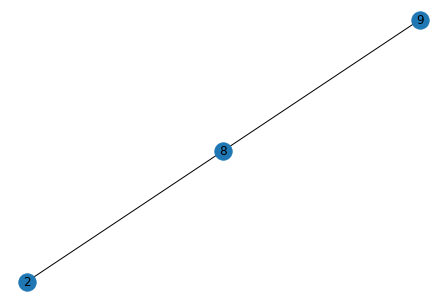

match_branches = [[8, 9]]
edges_to_delete (resolve crossover) = [[2, 8], [2, 9]]
edges_to_create (resolve crossover) = [[8, 9]]
Rejecting creating edge [8, 9] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([2, 8]), array([2, 9]), array([8, 9])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {5, 8, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}
Comp 1 = {2}
Comp 2 = {0, 1, 3, 4, 6, 7, 9, 10, 14, 27}
curr_limb_copy.deleted_edges = [array([2, 8]), array([2, 9]), array([8, 9])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([2, 8]), array([2, 9]), array([8, 9])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of t

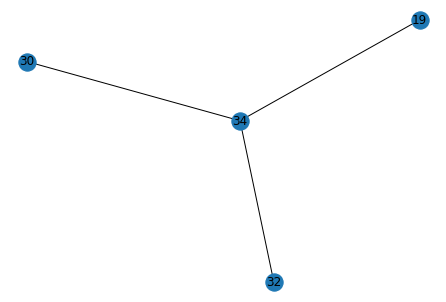

match_branches = [[30, 32], [19, 34]]
edges_to_delete (resolve crossover) = [[19, 30], [19, 32], [30, 34], [32, 34]]
edges_to_create (resolve crossover) = [[30, 32], [19, 34]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[19, 30], [19, 32], [30, 34], [32, 34]]
edges_to_create = [[30, 32], [19, 34]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 43, 44, 45, 46}
Comp 1 = {34, 4, 40, 41, 10, 42, 18, 19}
curr_limb_copy.deleted_edges = [[19, 30], [19, 32], [30, 34], [32, 34]]
curr_limb_copy.created_edges = [[30, 32], [19, 34]]
After get best cut: cut_edges = [[19, 30], [19, 32], [30, 34], [32, 34]], added_edges = [[30, 32], [19, 34]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the spl

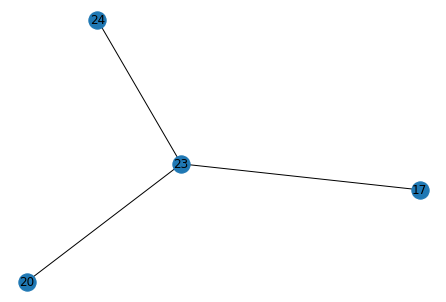

match_branches = [[23, 24]]
edges_to_delete (resolve crossover) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create (resolve crossover) = [[23, 24]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 10 because skeletal distance was 1637.0213414854172 and threshold was 2500
skip_nodes = [10]
edges_to_delete (cut_limb_network) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create = [[23, 24]]
Number of connected components = 3
Comp 0 = {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}
Comp 1 = {0, 1, 15, 16, 17}
Comp 2 = {20}
curr_limb_copy.deleted_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
curr_limb_copy.created_edges = [[23, 24]]
After get best cut: cut_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]], added_edges = [[23, 24]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 

  Edge: [14 19]: curr_angle = 23.12
  Edge: [19 23]: curr_angle = 35.64
  Edge: [23 24]: curr_angle = 11.19
  Edge: [24 21]: curr_angle = 24.3
  Edge: [21 28]: curr_angle = 30.38
  Edge: [28 30]: curr_angle = 17.2
  Edge: [30 32]: curr_angle = 38.22

Total time for doubling_back = 0.8974800109863281

Attempting the width jump check (attempting from both sides)
  Edge: [14 19]: jump = -146.17
  Edge: [19 23]: jump = 33.43
  Edge: [23 24]: jump = 210.33
Adding error edge [23 24] because width jump was 210.3331955215474
  Edge: [24 21]: jump = -35.03
  Edge: [21 28]: jump = -21.68
  Edge: [28 30]: jump = 119.98
  Edge: [30 32]: jump = -19.01
Total time for width = 0.8571598529815674
Path starting at 10 had err_edges: [[23, 24]]
  Edge: [32 30]: jump = 19.01
  Edge: [30 28]: jump = -87.43
  Edge: [28 21]: jump = -77.48
  Edge: [21 24]: jump = 35.03
  Edge: [24 23]: jump = -210.33
  Edge: [23 19]: jump = -33.43
  Edge: [19 14]: jump = 69.67
Total time for width = 0.6944305896759033
Path sta

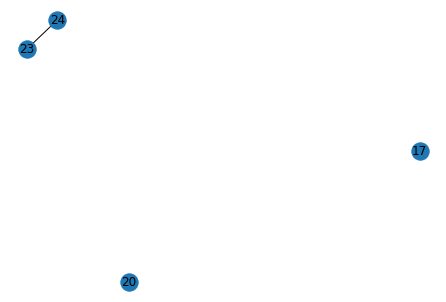

match_branches = [[23, 24]]
edges_to_delete (resolve crossover) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create (resolve crossover) = [[23, 24]]
Rejecting creating edge [23, 24] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])]
edges_to_create = []
Number of connected components = 4
Comp 0 = {32, 33, 34, 4, 5, 8, 9, 11, 21, 22, 24, 28, 29, 30, 31}
Comp 1 = {0, 1, 15, 16, 17}
Comp 2 = {20}
Comp 3 = {2, 3, 6, 7, 10, 12, 13, 14, 18, 19, 23, 25, 26, 27}
curr_limb_copy.deleted_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])]
curr_limb_copy.created_edges = [[23, 24]]
After get best cut: cut_edges = [array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])], added_edges = []


  Edge: [14 19]: curr_angle = 23.12
  Edge: [19 23]: curr_angle = 35.64
  Edge: [23 24]: curr_angle = 11.19
  Edge: [24 21]: curr_angle = 24.3
  Edge: [21 28]: curr_angle = 30.38
  Edge: [28 30]: curr_angle = 17.2
  Edge: [30 32]: curr_angle = 38.22

Total time for doubling_back = 1.01596999168396

Attempting the width jump check (attempting from both sides)
  Edge: [14 19]: jump = -146.17
  Edge: [19 23]: jump = 33.43
  Edge: [23 24]: jump = 210.33
Adding error edge [23 24] because width jump was 210.3331955215474
  Edge: [24 21]: jump = -35.03
  Edge: [21 28]: jump = -21.68
  Edge: [28 30]: jump = 119.98
  Edge: [30 32]: jump = -19.01
Total time for width = 0.8527419567108154
Path starting at 10 had err_edges: [[23, 24]]
  Edge: [32 30]: jump = 19.01
  Edge: [30 28]: jump = -87.43
  Edge: [28 21]: jump = -77.48
  Edge: [21 24]: jump = 35.03
  Edge: [24 23]: jump = -210.33
  Edge: [23 19]: jump = -33.43
  Edge: [19 14]: jump = 69.67
Total time for width = 0.7001242637634277
Path start

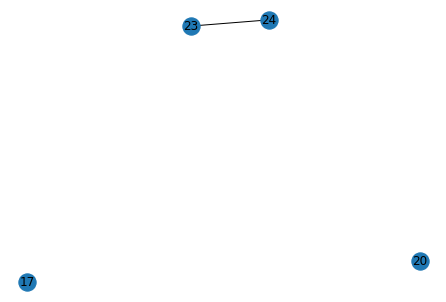

match_branches = [[23, 24]]
edges_to_delete (resolve crossover) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create (resolve crossover) = [[23, 24]]
Rejecting creating edge [23, 24] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])]
edges_to_create = []
Number of connected components = 4
Comp 0 = {32, 33, 34, 4, 5, 8, 9, 11, 21, 22, 24, 28, 29, 30, 31}
Comp 1 = {0, 1, 15, 16, 17}
Comp 2 = {20}
Comp 3 = {2, 3, 6, 7, 10, 12, 13, 14, 18, 19, 23, 25, 26, 27}
curr_limb_copy.deleted_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24]), array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])]
curr_limb_copy.created_edges = [[23, 24]]
After get best cut: cut_edges = [array([17, 20]), a

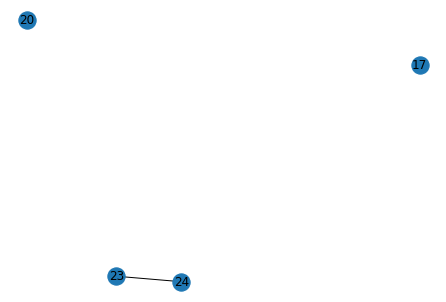

match_branches = [[23, 24]]
edges_to_delete (resolve crossover) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create (resolve crossover) = [[23, 24]]
curr_limb.deleted_edges 5 =[[17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24]), array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])]
Skipping endnode 10 because skeletal distance was 1637.0213414854172 and threshold was 2500
skip_nodes = [10]
edges_to_delete (cut_limb_network) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create = [[23, 24]]
Number of connected components = 3
Comp 0 = {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}
Comp 1 = {0, 1, 15, 16, 17}
Comp 2 = {20}
curr_limb_copy.deleted_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([17, 20]), array([17, 23]), array([17, 24]

  Edge: [14 19]: curr_angle = 23.12
  Edge: [19 23]: curr_angle = 35.64
  Edge: [23 24]: curr_angle = 11.19
  Edge: [24 21]: curr_angle = 24.3
  Edge: [21 28]: curr_angle = 30.38
  Edge: [28  8]: curr_angle = 108.54
  Edge: [8 9]: curr_angle = 154.09
  Edge: [ 9 11]: curr_angle = 144.22
  Edge: [11 34]: curr_angle = 16.29

Total time for doubling_back = 1.467585563659668
There were 3 edges that passed doubling back threshold of 100
Winning edge [8 9] had a doubling back of 154.08856869489412
***inside resolve crossover!!!!****
coordinate_branches = [4, 8, 9]
4 = red
8 = aqua
9 = purple
Angle between 4 and 8 = 35.06 
Angle between 4 and 9 = 57.56 
Angle between 8 and 9 = 157.43 
Final Matches = []
matched_branches_revised = []
Original graph


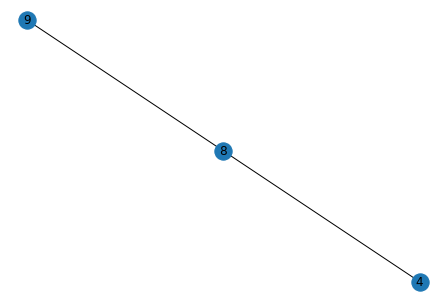

match_branches = []
edges_to_delete (resolve crossover) = [[4, 8], [4, 9], [8, 9]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([4, 8]), array([4, 9]), array([8, 9])]
edges_to_create = []
Number of connected components = 5
Comp 0 = {33, 34, 5, 9, 11}
Comp 1 = {4}
Comp 2 = {2, 3, 6, 7, 8, 10, 12, 13, 14, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}
Comp 3 = {0, 1, 15, 16, 17}
Comp 4 = {20}
curr_limb_copy.deleted_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24]), array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24]), [17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([4, 8]), array([4, 9]), array([8, 9])]
curr_limb_copy.created_edges = [[23, 24], [23, 24]]
After get best cut: cut_edges = [array([4, 8]), array([4, 9]), array([8, 9])], added_edges = []
total_soma_paths_to_cut = [[

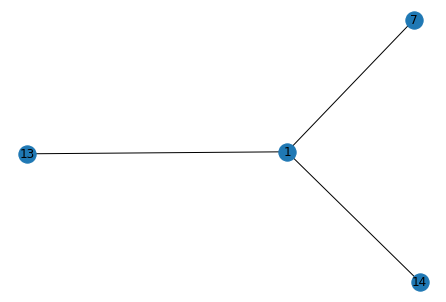

match_branches = [[7, 14]]
edges_to_delete (resolve crossover) = [[1, 7], [1, 13], [1, 14], [7, 13], [13, 14]]
edges_to_create (resolve crossover) = [[7, 14]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 7], [1, 13], [1, 14], [7, 13], [13, 14]]
edges_to_create = [[7, 14]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 8, 9}
Comp 1 = {3, 4, 5, 6, 7, 14}
Comp 2 = {10, 11, 12, 13, 15, 16, 17, 18}
curr_limb_copy.deleted_edges = [[1, 7], [1, 13], [1, 14], [7, 13], [13, 14]]
curr_limb_copy.created_edges = [[7, 14]]
After get best cut: cut_edges = [[1, 7], [1, 13], [1, 14], [7, 13], [13, 14]], added_edges = [[7, 14]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([0, 

  Edge: [0 1]: curr_angle = 28.44

Total time for doubling_back = 0.2178211212158203

Attempting the width jump check (attempting from both sides)
  Edge: [0 1]: jump = 98.39
Total time for width = 0.19711947441101074
Path starting at 0 had err_edges: []
  Edge: [1 0]: jump = -98.39
Total time for width = 0.19706463813781738
Path starting at 1 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
Total number of graphs at the end of the split = 1: [array([0, 1, 2])]


 ------ Total time for Splitting 864691135699307810 = 177.74731826782227 ------


----- Working on 864691135683949751-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = [0 3 6 7]


 -------- Work

  Edge: [77 71]: curr_angle = 74.38
  Edge: [71 67]: curr_angle = 48.16
  Edge: [67 69]: curr_angle = 26.8
  Edge: [ 69 111]: curr_angle = 49.05
  Edge: [111  98]: curr_angle = 141.71
  Edge: [98 94]: curr_angle = 47.62

Total time for doubling_back = 0.5169484615325928
There were 1 edges that passed doubling back threshold of 100
Winning edge [111  98] had a doubling back of 141.71126038453752
***inside resolve crossover!!!!****
coordinate_branches = [98, 110, 111]
98 = red
110 = aqua
111 = purple
Angle between 98 and 110 = 24.89 
Angle between 98 and 111 = 106.97 
Angle between 110 and 111 = 48.36 
Final Matches = [[98, 110]]
matched_branches_revised = [[98, 110]]
Original graph


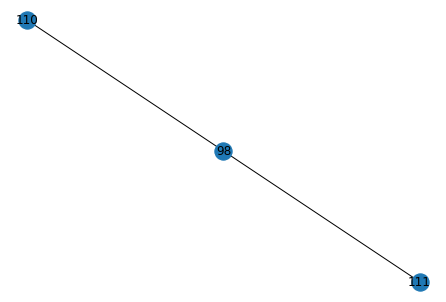

match_branches = [[98, 110]]
edges_to_delete (resolve crossover) = [[98, 111], [110, 111]]
edges_to_create (resolve crossover) = [[98, 110]]
edges_to_delete (cut_limb_network) = [array([ 98, 111]), array([110, 111])]
edges_to_create = [[98, 110]]
Number of connected components = 2
Comp 0 = {0, 2, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118}
Comp 1 = {1, 98, 3, 4, 6, 8, 110, 93, 94, 95}
curr_limb_copy.deleted_edges = [array([ 98, 111]), array([110, 111])]
curr_limb_copy.created_edges = [[98, 110]]
After get best cut: cut_edges = [array([ 98, 111]), array([110, 111])], added_edges = [[98, 110]]
to

  Edge: [77 71]: curr_angle = 74.38
  Edge: [71 83]: curr_angle = 74.24
  Edge: [83 96]: curr_angle = 75.74
  Edge: [ 96 117]: curr_angle = 79.91
  Edge: [117  99]: curr_angle = 108.78
  Edge: [ 99 100]: curr_angle = 86.68
  Edge: [100 102]: curr_angle = 24.88

Total time for doubling_back = 0.14026522636413574
There were 1 edges that passed doubling back threshold of 100
Winning edge [117  99] had a doubling back of 108.7834284741322
***inside resolve crossover!!!!****
coordinate_branches = [99, 101, 117]
99 = red
101 = aqua
117 = purple
Angle between 99 and 101 = 5.08 
Angle between 99 and 117 = 103.7 
Angle between 101 and 117 = 72.35 
Final Matches = [[99, 101]]
matched_branches_revised = [[99, 101]]
Original graph


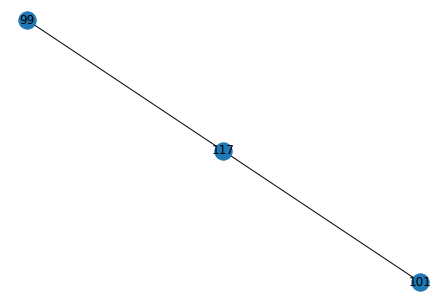

match_branches = [[99, 101]]
edges_to_delete (resolve crossover) = [[99, 117], [101, 117]]
edges_to_create (resolve crossover) = [[99, 101]]
edges_to_delete (cut_limb_network) = [array([ 99, 117]), array([101, 117])]
edges_to_create = [[99, 101]]
Number of connected components = 3
Comp 0 = {97, 99, 100, 101, 102, 104, 9, 11, 76, 80, 88, 89}
Comp 1 = {0, 2, 5, 7, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 90, 91, 92, 96, 103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118}
Comp 2 = {1, 98, 3, 4, 6, 8, 110, 93, 94, 95}
curr_limb_copy.deleted_edges = [array([ 98, 111]), array([110, 111]), array([ 99, 117]), array([101, 117])]
curr_limb_copy.created_edges = [[98, 110], [99, 101]]
After get best cut: cut_edges = [array([ 

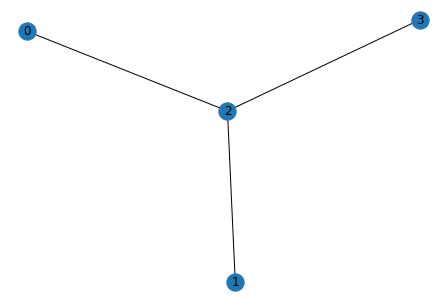

match_branches = [[0, 3], [1, 2]]
edges_to_delete (resolve crossover) = [[0, 1], [0, 2], [1, 3], [2, 3]]
edges_to_create (resolve crossover) = [[0, 3], [1, 2]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[0, 1], [0, 2], [1, 3], [2, 3]]
edges_to_create = [[0, 3], [1, 2]]
Number of connected components = 2
Comp 0 = {0, 3, 4, 5, 6, 7}
Comp 1 = {1, 2}
curr_limb_copy.deleted_edges = [[0, 1], [0, 2], [1, 3], [2, 3]]
curr_limb_copy.created_edges = [[0, 3], [1, 2]]
After get best cut: cut_edges = [[0, 1], [0, 2], [1, 3], [2, 3]], added_edges = [[0, 3], [1, 2]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([0, 3, 4, 5, 6, 7]), array([1, 2])]


 -------- Working on limb 6--------

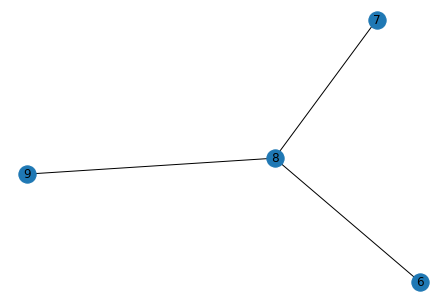

match_branches = [[7, 8], [6, 9]]
edges_to_delete (resolve crossover) = [[6, 7], [6, 8], [7, 9], [8, 9]]
edges_to_create (resolve crossover) = [[7, 8], [6, 9]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[6, 7], [6, 8], [7, 9], [8, 9]]
edges_to_create = [[7, 8], [6, 9]]
Number of connected components = 2
Comp 0 = {8, 7}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 9}
curr_limb_copy.deleted_edges = [[6, 7], [6, 8], [7, 9], [8, 9]]
curr_limb_copy.created_edges = [[7, 8], [6, 9]]
After get best cut: cut_edges = [[6, 7], [6, 8], [7, 9], [8, 9]], added_edges = [[7, 8], [6, 9]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([8, 7]), array([0, 1, 2, 3, 4, 5, 6, 9])]


 -------- Working on li

No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [5 6]: curr_angle = 39.01

Total time for doubling_back = 0.04484081268310547

Attempting the width jump check (attempting from both sides)
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [5 6]: jump = -30.24
Total time for width = 0.012121200561523438
Path starting at 5 had err_edges: []
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [6 5]: jump = 30.24
Total time for width = 0.014733076095581055
Path starting at 6 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2, 3, 4, 5, 6}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
Total number of graphs at the end of the split = 1: [arra

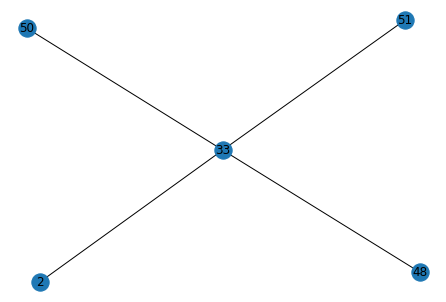

match_branches = [[33, 50], [2, 51]]
edges_to_delete (resolve crossover) = [[2, 33], [2, 48], [2, 50], [33, 48], [33, 51], [48, 50], [48, 51], [50, 51]]
edges_to_create (resolve crossover) = [[33, 50], [2, 51]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[2, 33], [2, 48], [2, 50], [33, 48], [33, 51], [48, 50], [48, 51], [50, 51]]
edges_to_create = [[33, 50], [2, 51]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 51, 52, 53, 54, 55, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98}
Comp 1 = {33, 70, 72, 15, 17, 50, 18, 56, 58, 30}
Comp 2 = {48}
curr_limb_copy.deleted_edges = [[2, 33], [2, 48], [2, 50], [33, 48], [33, 51], [48, 50], [48, 51], [50, 51]]
curr_limb_copy.created_edges =

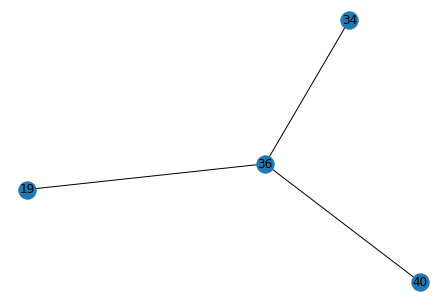

match_branches = [[34, 36]]
edges_to_delete (resolve crossover) = [[19, 34], [19, 36], [19, 40], [34, 40], [36, 40]]
edges_to_create (resolve crossover) = [[34, 36]]
curr_limb.deleted_edges 5 =[[2, 33], [2, 48], [2, 50], [33, 48], [33, 51], [48, 50], [48, 51], [50, 51]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[19, 34], [19, 36], [19, 40], [34, 40], [36, 40]]
edges_to_create = [[34, 36]]
Number of connected components = 7
Comp 0 = {0, 1, 2, 3, 4, 5, 9, 10, 11, 12, 13, 14, 16, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 49, 51, 52, 53, 54, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 73, 74, 75, 80, 83, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98}
Comp 1 = {33, 70, 72, 15, 17, 18, 50, 56, 58, 30}
Comp 2 = {48}
Comp 3 = {19}
Comp 4 = {68, 69, 6, 71, 40, 8, 7, 76, 78, 79, 81, 82, 84, 87, 55}
Comp 5 = {38}
Comp 6 = {77}
curr_limb_copy.deleted_edges = [[2, 33], [2, 48], [2, 50], [33, 48], [33, 51], [48, 50], [48, 51], [50, 5

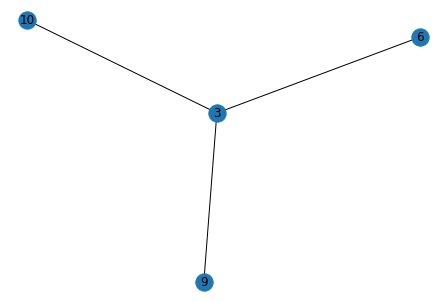

match_branches = [[6, 9], [3, 10]]
edges_to_delete (resolve crossover) = [[3, 6], [3, 9], [6, 10], [9, 10]]
edges_to_create (resolve crossover) = [[6, 9], [3, 10]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[3, 6], [3, 9], [6, 10], [9, 10]]
edges_to_create = [[6, 9], [3, 10]]
Number of connected components = 2
Comp 0 = {1, 4, 5, 6, 7, 9, 13, 14, 18, 21}
Comp 1 = {0, 2, 3, 8, 10, 11, 12, 15, 16, 17, 19, 20, 22}
curr_limb_copy.deleted_edges = [[3, 6], [3, 9], [6, 10], [9, 10]]
curr_limb_copy.created_edges = [[6, 9], [3, 10]]
After get best cut: cut_edges = [[3, 6], [3, 9], [6, 10], [9, 10]], added_edges = [[6, 9], [3, 10]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 

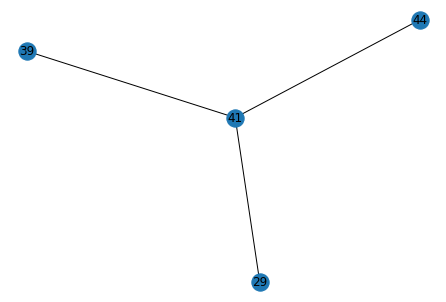

match_branches = [[39, 41]]
edges_to_delete (resolve crossover) = [[29, 39], [29, 41], [29, 44], [39, 44], [41, 44]]
edges_to_create (resolve crossover) = [[39, 41]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 47 because skeletal distance was 2337.338269570581 and threshold was 2500
skip_nodes = [47]
edges_to_delete (cut_limb_network) = [[29, 39], [29, 41], [29, 44], [39, 44], [41, 44]]
edges_to_create = [[39, 41]]
Number of connected components = 2
Comp 0 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69}
Comp 1 = {0, 21, 29}
curr_limb_copy.deleted_edges = [[29, 39], [29, 41], [29, 44], [39, 44], [41, 44]]
curr_limb_copy.created_edges = [[39, 41]]
After get best cut: cut_edges = [[29, 39], [29, 41], [29, 44], [39, 44], [41, 44]], added_edges = [[39, 41]]
total_soma_paths_to_

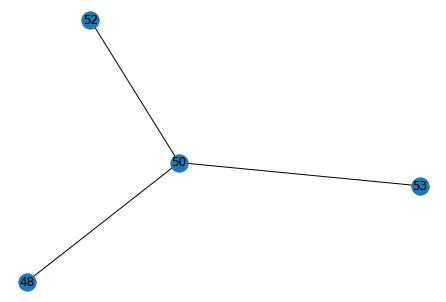

match_branches = [[48, 52]]
edges_to_delete (resolve crossover) = [[48, 50], [48, 53], [50, 52], [50, 53], [52, 53]]
edges_to_create (resolve crossover) = [[48, 52]]
curr_limb.deleted_edges 5 =[[29, 39], [29, 41], [29, 44], [39, 44], [41, 44]]
Skipping endnode 47 because skeletal distance was 2337.338269570581 and threshold was 2500
skip_nodes = [47]
edges_to_delete (cut_limb_network) = [[48, 50], [48, 53], [50, 52], [50, 53], [52, 53]]
edges_to_create = [[48, 52]]
Number of connected components = 5
Comp 0 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 49, 50, 54, 55}
Comp 1 = {0, 21, 29}
Comp 2 = {64, 65, 66, 67, 68, 69, 44, 47, 48, 52, 56, 57, 58, 59, 60, 61, 62, 63}
Comp 3 = {53}
Comp 4 = {51}
curr_limb_copy.deleted_edges = [[29, 39], [29, 41], [29, 44], [39, 44], [41, 44], [48, 50], [48, 53], [50, 52], [50, 53], [52, 53]]
curr_limb_copy.created_edges = [[39, 41], [

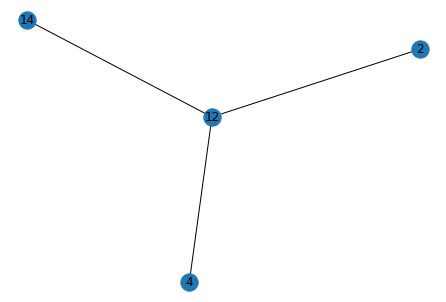

match_branches = [[12, 14]]
edges_to_delete (resolve crossover) = [[2, 4], [2, 12], [2, 14], [4, 12], [4, 14]]
edges_to_create (resolve crossover) = [[12, 14]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[2, 4], [2, 12], [2, 14], [4, 12], [4, 14]]
edges_to_create = [[12, 14]]
Number of connected components = 4
Comp 0 = {0, 1, 3, 5, 6, 7, 8.0, 9, 10.0, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94}
Comp 1 = {2}
Comp 2 = {4}
Comp 3 = {13}
curr_limb_copy.deleted_edges = [[2, 4], [2, 12], [2, 14], [4, 12], [4, 14]]
curr_limb_copy.created_edges = [[12, 14]]
After get best cut: cut_edges = [[2, 4], [2, 12], [2, 14], [4, 12], [4, 14]], added_edges = [[12, 14]]
total_soma_pa

  Edge: [18 12]: curr_angle = 33.67
  Edge: [12 14]: curr_angle = 14.4
  Edge: [14 15]: curr_angle = 15.64
  Edge: [15 17]: curr_angle = 23.94
  Edge: [17 24]: curr_angle = 38.26
  Edge: [24 25]: curr_angle = 32.48
  Edge: [25 27]: curr_angle = 30.31
  Edge: [27 39]: curr_angle = 49.61
  Edge: [39 53]: curr_angle = 41.22
  Edge: [53 55]: curr_angle = 22.98
  Edge: [55 56]: curr_angle = 10.51
  Edge: [56 61]: curr_angle = 45.62
  Edge: [61 63]: curr_angle = 13.19
  Edge: [63 65]: curr_angle = 22.58
  Edge: [65 70]: curr_angle = 32.86
  Edge: [70 69]: curr_angle = 30.2
  Edge: [69 67]: curr_angle = 25.62

Total time for doubling_back = 1.658134937286377

Attempting the width jump check (attempting from both sides)
  Edge: [18 12]: jump = -57.97
  Edge: [12 14]: jump = 56.4
  Edge: [14 15]: jump = 139.74
  Edge: [15 17]: jump = 28.82
  Edge: [17 24]: jump = -228.07
  Edge: [24 25]: jump = -223.19
  Edge: [25 27]: jump = -37.89
  Edge: [27 39]: jump = 58.83
  Edge: [39 53]: jump = 21.76
  

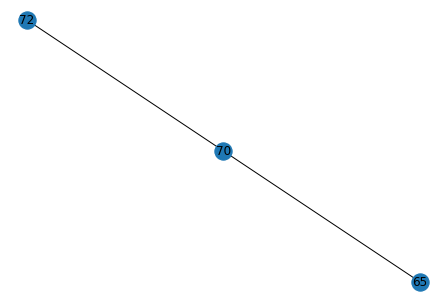

match_branches = [[65, 70]]
edges_to_delete (resolve crossover) = [[65, 72], [70, 72]]
edges_to_create (resolve crossover) = [[65, 70]]
Rejecting creating edge [65, 70] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([65, 70]), array([65, 72]), array([70, 72])]
edges_to_create = []
Number of connected components = 6
Comp 0 = {67, 69, 70, 71, 41, 42, 77, 78, 79, 80, 81, 82, 52, 54, 57, 59, 60}
Comp 1 = {0, 1, 3, 5, 6, 7, 8.0, 9, 10.0, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 55, 56, 58, 61, 62, 63, 64, 65, 66, 68, 73, 74, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94}
Comp 2 = {72, 75, 76}
Comp 3 = {2}
Comp 4 = {4}
Comp 5 = {13}
curr_limb_copy.deleted_edges = [[2, 4], [2, 12], [2, 14], [4, 12], [4, 14], array([65, 70]), array([65, 72]), array([70, 72])]
curr_limb_copy.created_edges = [[12, 14]]
After get best cut: cut_edg

  Edge: [23 20]: curr_angle = 15.0
  Edge: [20 21]: curr_angle = 32.19
  Edge: [21 25]: curr_angle = 56.17
  Edge: [25 28]: curr_angle = 31.32
  Edge: [28 34]: curr_angle = 27.89
  Edge: [34 35]: curr_angle = 18.04
  Edge: [35 36]: curr_angle = 9.1

Total time for doubling_back = 0.8789587020874023

Attempting the width jump check (attempting from both sides)
  Edge: [23 20]: jump = 53.78
  Edge: [20 21]: jump = -88.81
  Edge: [21 25]: jump = -464.38
  Edge: [25 28]: jump = 96.39
  Edge: [28 34]: jump = 152.34
  Edge: [34 35]: jump = 52.45
  Edge: [35 36]: jump = 102.09
Total time for width = 0.8609457015991211
Path starting at 26 had err_edges: []
  Edge: [36 35]: jump = -102.09
  Edge: [35 34]: jump = -52.45
  Edge: [34 28]: jump = -152.34
  Edge: [28 25]: jump = -96.39
  Edge: [25 21]: jump = 377.65
Adding error edge [25 21] because width jump was 377.6461011164357
  Edge: [21 20]: jump = 388.24
Adding error edge [21 20] because width jump was 388.2381348992647
  Edge: [20 23]: jump

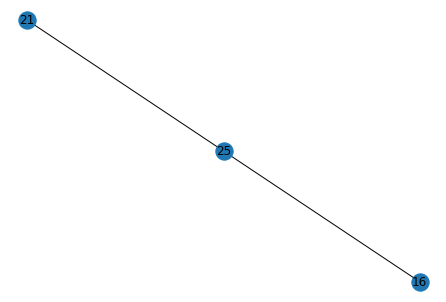

match_branches = [[16, 21]]
edges_to_delete (resolve crossover) = [[16, 25], [21, 25]]
edges_to_create (resolve crossover) = [[16, 21]]
edges_to_delete (cut_limb_network) = [array([16, 25]), array([21, 25])]
edges_to_create = [[16, 21]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27}
Comp 1 = {32, 33, 34, 35, 36, 13, 25, 28, 29, 30, 31}
curr_limb_copy.deleted_edges = [array([16, 25]), array([21, 25])]
curr_limb_copy.created_edges = [[16, 21]]
After get best cut: cut_edges = [array([16, 25]), array([21, 25])], added_edges = [[16, 21]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 

  Edge: [0 2]: curr_angle = 65.45

Total time for doubling_back = 0.1996922492980957

Attempting the width jump check (attempting from both sides)
  Edge: [0 2]: jump = -48.17
Total time for width = 0.1763629913330078
Path starting at 0 had err_edges: []
  Edge: [2 0]: jump = 48.17
Total time for width = 0.17509150505065918
Path starting at 2 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
Total number of graphs at the end of the split = 1: [array([0, 1, 2])]


 ------ Total time for Splitting 864691135526114907 = 255.99387335777283 ------


----- Working on 864691135567752172-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = [3]


 -------- Working on 

In [11]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")